<a href="https://colab.research.google.com/github/aadhamashraf/DSAI-307-Final-Project/blob/main/DSAI-307-Final-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and Intiating Modules**

In [ ]:
install.packages("colorspace")
install.packages("tidyverse")
install.packages("car")

In [ ]:
library(tidyverse) # metapackage of all tidyverse packages
library(car) # for the vif function to check for multicollinearity
library(dplyr) # for data manipulation
library(ggplot2) # for data visualization
library(readr) # for data import
library(tidyr) # for data tidying

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [ ]:
# importing utilities.R
source("Utilities.R")

# **Obtain & Preprocessing the Data Set**

In [ ]:
diabetes_data <- read_csv("diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


**Dataset Columns:**
1. Pregnancies: Number of times the patient has been pregnant.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).
8. Age: Age of the patient (years).
9. Outcome: Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

In [ ]:
colnames(diabetes_data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

**Check out for Nulls**

In [ ]:
diabetes_data %>%
summarise_all(funs(sum(is.na(.))))

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


**Visualize the feature distributions to show whether the data needs scaling or not**

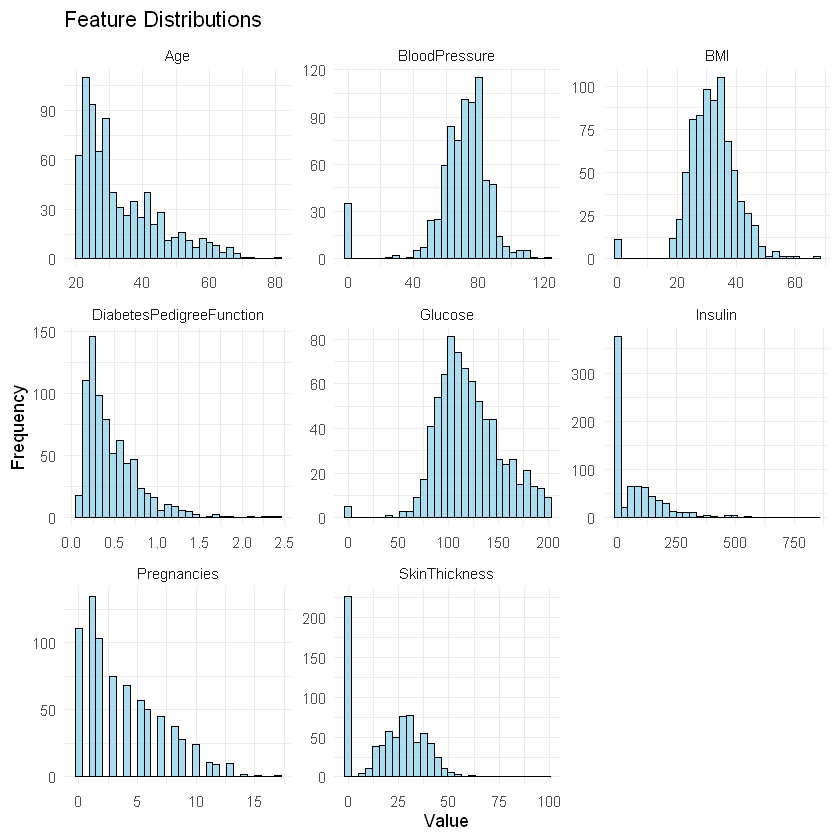

In [ ]:
df_long <- diabetes_data %>%
  select(-Outcome) %>%
  gather()

ggplot(df_long, aes(x = value)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  facet_wrap(~ key, scales = 'free') +
  theme_minimal() +
  labs(title = "Feature Distributions", x = "Value", y = "Frequency")

1. Age: The distribution is relatively uniform, with a slight skew towards younger ages. Scaling might not be strictly necessary here.
2. BloodPressure: The distribution is skewed towards lower values, with a long tail towards higher values. Scaling could be beneficial to normalize the influence of extreme values.
3. BMI: The distribution is roughly bell-shaped, with a slight skew towards higher values. Scaling might improve model performance, especially if using distance-based algorithms.
4. DiabetesPedigreeFunction: The distribution is heavily skewed towards lower values, with a long tail towards higher values. Scaling is highly recommended to address the imbalance.
5. Glucose: The distribution is skewed towards lower values, with a long tail towards higher values. Scaling is recommended.
6. Insulin: The distribution is heavily skewed towards lower values, with a long tail towards higher values. Scaling is highly recommended.
7. Pregnancies: The distribution is skewed towards lower values, with a long tail towards higher values. Scaling is recommended.
8. SkinThickness: The distribution is skewed towards lower values, with a long tail towards higher values. Scaling is recommended.

In [ ]:
df_long <- diabetes_data %>%
  select(-Outcome) %>%
  scale()

df_scaled <- cbind(df_long, Outcome = diabetes_data$Outcome)

**Outliers Detection and Handler**

In [ ]:
numerical_features <- c("Age","BloodPressure", "BMI", "DiabetesPedigreeFunction", "Glucose", "Insulin", "Pregnancies", "SkinThickness")
for (feature in numerical_features) {
  diabetes_data <- handle_outliers(diabetes_data, feature)
}

[1] "Outliers in Age : 69, 67, 72, 81, 67, 67, 70, 68, 69"
[1] "Outliers in BloodPressure : 0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0"
[1] "Outliers in BMI : 0, 0, 0, 0, 53.2, 55, 0, 67.1, 52.3, 52.3, 52.9, 0, 0, 59.4, 0, 0, 57.3, 0, 0"
[1] "Outliers in DiabetesPedigreeFunction : 2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394"
[1] "Outliers in Glucose : 0, 0, 0, 0, 0"
[1] "Outliers in Insulin : 543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510"
[1] "Outliers in Pregnancies : 15, 17, 14, 14"
[1] "Outliers in SkinThickness : 99"


# **PART 1: Exploratory Analysis:**

1. The average glucose levels among patients with and without diabetes.
2. The average age of patients with and without diabetes.
3. The average blood pressure measurements across diabetic and non-diabetic groups.
4. The average BMI of diabetic versus non-diabetic patients.
5. The rate of diabetes among patients in the dataset.
6. The distribution of BMI values among all patients.
7. The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.
8. The relationship between the number of pregnancies and diabetes occurrence.
9. The correlation between glucose levels and BMI.
10. The trend of glucose levels with age among diabetic and non-diabetic patients.


**The average glucose levels among patients with and without diabetes.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Glucose = mean(Glucose)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_Glucose
<chr>,<dbl>
Without Diabetes,110.2027
Diabetes,141.5345


**The average age of patients with and without diabetes.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Age = floor(mean(Age))) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_Age
<chr>,<dbl>
Without Diabetes,31
Diabetes,37


**The average blood pressure measurements across diabetic and non-diabetic groups.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_Blood_Pressure = mean(BloodPressure)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_Blood_Pressure
<chr>,<dbl>
Without Diabetes,69.5080
Diabetes,72.8806


**The average BMI of diabetic versus non-diabetic patients.**

In [ ]:
diabetes_data %>%
  group_by(Outcome) %>%
  summarise(Average_BMI = mean(BMI)) %>%
  mutate(Outcome = ifelse(Outcome == 0, "Without Diabetes", "Diabetes"))

Outcome,Average_BMI
<chr>,<dbl>
Without Diabetes,30.5275
Diabetes,35.1056


**The rate of diabetes among patients in the dataset.**

In [ ]:
diabetes_rate <- diabetes_data %>%
  summarise(Diabetes_Rate = mean(Outcome) * 100)
diabetes_rate

Diabetes_Rate
<dbl>
34.89583


**The distribution of BMI values among all patients.**

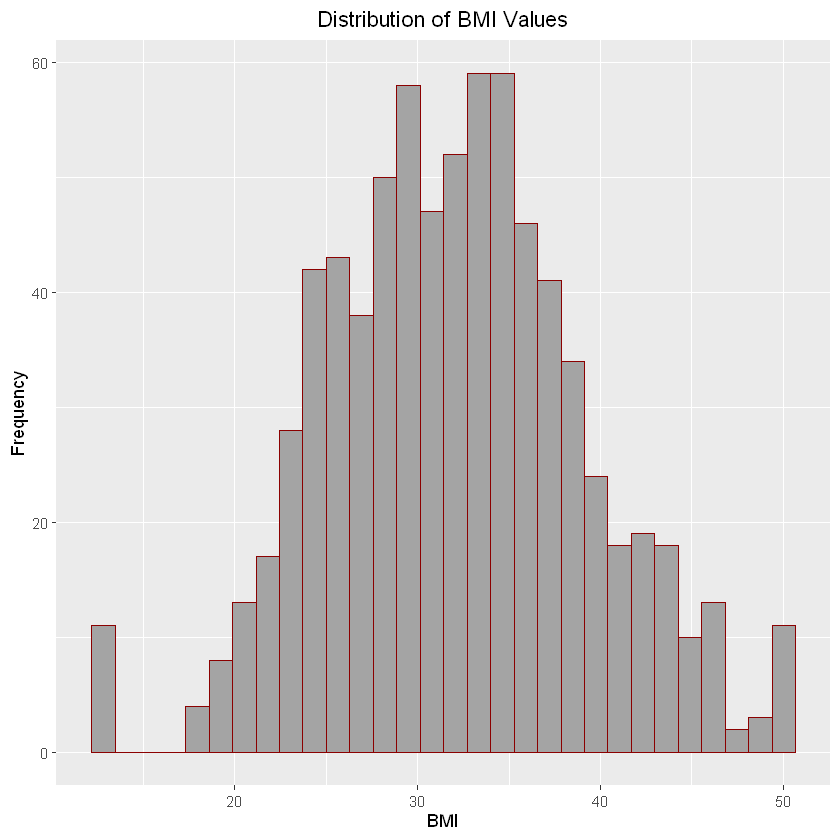

In [ ]:
ggplot(diabetes_data, aes(x = BMI)) +
  geom_histogram(bins = 30, fill = "#A4A4A4", color = "darkred") +
  labs(title = "Distribution of BMI Values", x = "BMI", y = "Frequency") +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5), axis.title.y = element_text(hjust = 0.5))

**The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.**

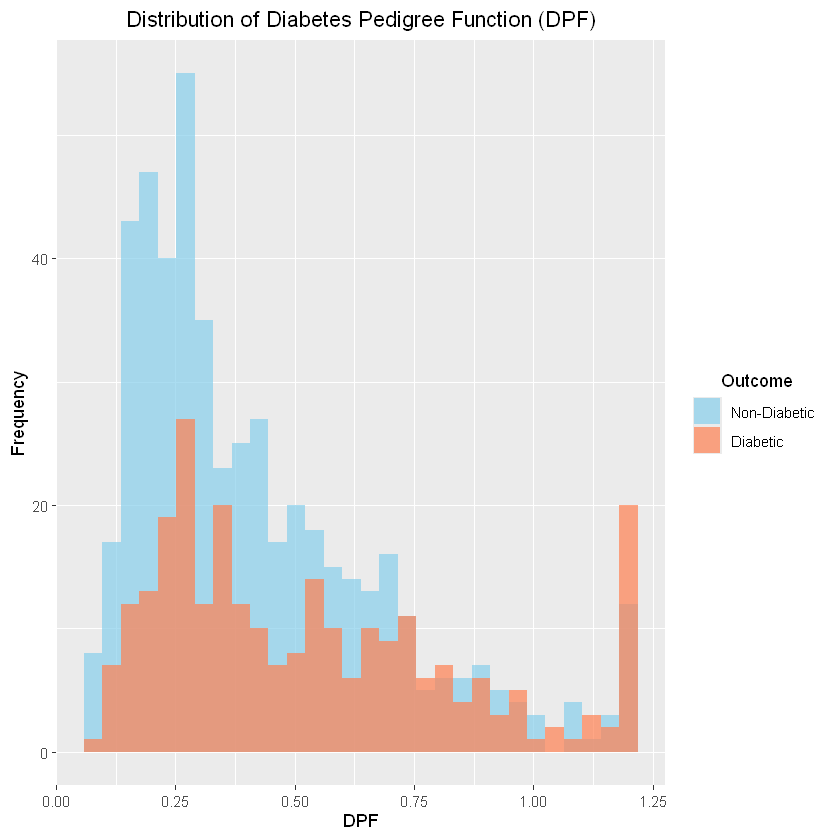

In [ ]:
ggplot(diabetes_data, aes(x = DiabetesPedigreeFunction, fill = as.factor(Outcome))) +
  geom_histogram(bins = 30, , alpha = 0.7 ,position = "identity") +
  labs(title = "Distribution of Diabetes Pedigree Function (DPF)", x = "DPF", y = "Frequency", fill = "Outcome") +
  scale_fill_manual(values = c("0" = "skyblue", "1" = "coral"), labels = c("Non-Diabetic", "Diabetic")) +
  theme(plot.title = element_text(hjust = 0.5),axis.title.x = element_text(hjust = 0.5),axis.title.y = element_text(hjust = 0.5),legend.title = element_text(hjust = 0.5))

**The relationship between the number of pregnancies and diabetes occurrence.**

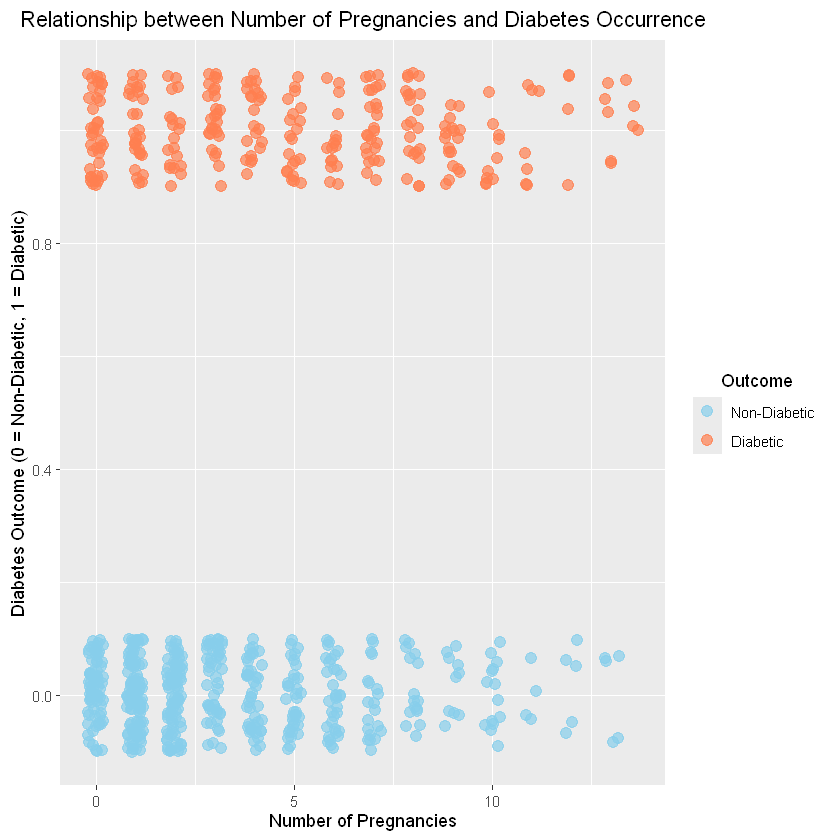

In [ ]:
ggplot(diabetes_data, aes(x = Pregnancies, y = Outcome, color = as.factor(Outcome))) +
  geom_jitter(alpha = 0.7, size = 3, width = 0.2, height = 0.1) +
  labs(
    title = "Relationship between Number of Pregnancies and Diabetes Occurrence",
    x = "Number of Pregnancies",
    y = "Diabetes Outcome (0 = Non-Diabetic, 1 = Diabetic)",
    color = "Outcome"
  ) +
  scale_color_manual(
    values = c("0" = "skyblue", "1" = "coral"),
    labels = c("Non-Diabetic", "Diabetic")
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )


**The correlation between glucose levels and BMI.**

In [ ]:
correlation_glucose_bmi <- cor(diabetes_data$Glucose, diabetes_data$BMI)
print(paste("Correlation between glucose levels and BMI:", correlation_glucose_bmi))

[1] "Correlation between glucose levels and BMI: 0.235541948374058"


**The trend of glucose levels with age among diabetic and non-diabetic patients**

`geom_smooth()` using formula = 'y ~ x'


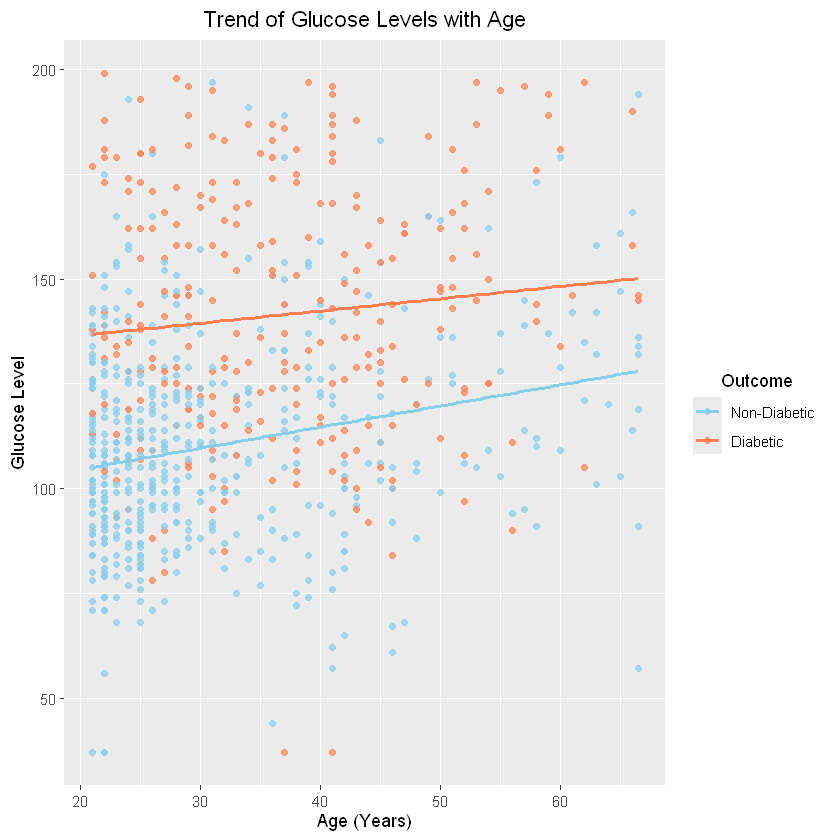

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Trend of Glucose Levels with Age",x = "Age (Years)",y = "Glucose Level",color = "Outcome") +
    scale_color_manual(values = c("0" = "skyblue", "1" = "coral"),labels = c("Non-Diabetic", "Diabetic")) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(hjust = 0.5),
    axis.title.y = element_text(hjust = 0.5),
    legend.title = element_text(hjust = 0.5)
  )

# **PART 2: Answering Questions:**

##2.0 Preprocessing required to answer the questions

In [ ]:
diabetes_data <- diabetes_data %>%
  mutate(Outcome = ifelse(Outcome == 0, "Not Diabetic", "Diabetic"))

In [ ]:
diabetes_data <- na.omit(diabetes_data)

In [ ]:
diabetes_data <- diabetes_data %>%
  filter(Glucose != 0 & BloodPressure != 0 & SkinThickness != 0 & Insulin != 0 & BMI != 0)

In [ ]:
set.seed(42)
diabetes_data <- diabetes_data %>%
  group_by(Outcome) %>%
  sample_n(min(table(diabetes_data$Outcome))) %>%
  ungroup()

## **2.1 Write down the answers to those analytical questions.**

1. Are higher glucose levels associated with a greater likelihood of diabetes?

2. Are patients with high glucose concentrations also likely to have higher BMI values?

3. Are patients with a higher number of pregnancies at greater risk of developing diabetes?

4. Are older patients more likely to have higher insulin concentrations and blood glucose levels?

5. Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?


###2.1.1

In [ ]:
t_test_result = t.test(diabetes_data$Glucose ~ diabetes_data$Outcome)
print(t_test_result)


	Welch Two Sample t-test

data:  diabetes_data$Glucose by diabetes_data$Outcome
t = 9.037, df = 252.08, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 24.35775 37.93264
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  145.1923                   114.0471 



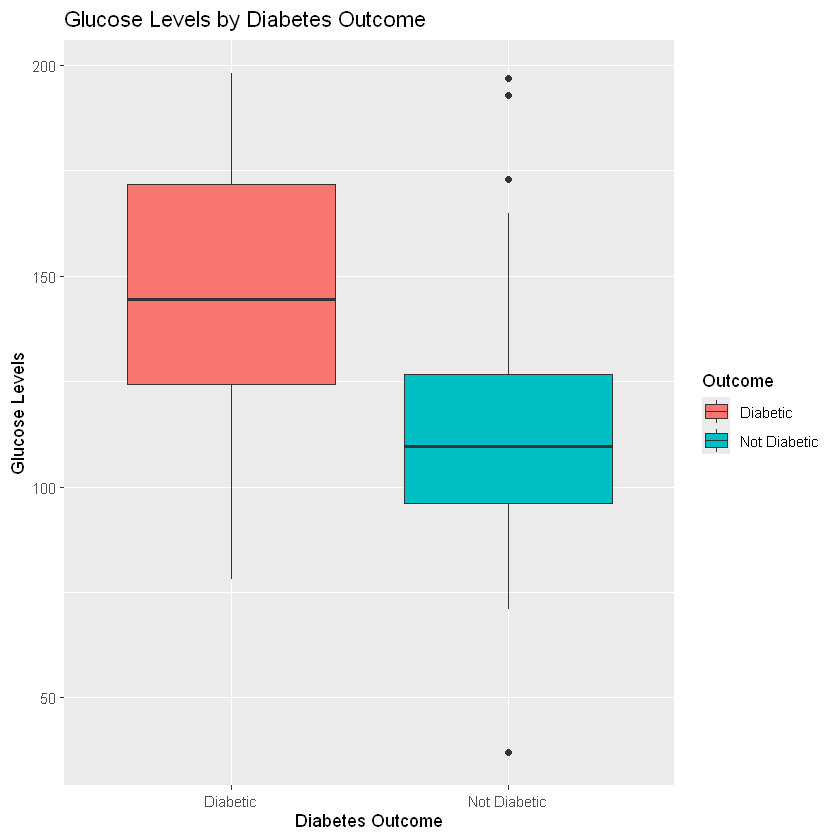

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = Glucose, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Glucose Levels", title = "Glucose Levels by Diabetes Outcome")

* The p-value being almost 0 from the t-test indicates a significant difference in glucose levels between diabetic and non-diabetic groups.
* The interquartile range (IQR) is notably higher for diabetic patients, suggesting that higher glucose levels are associated with diabetes.

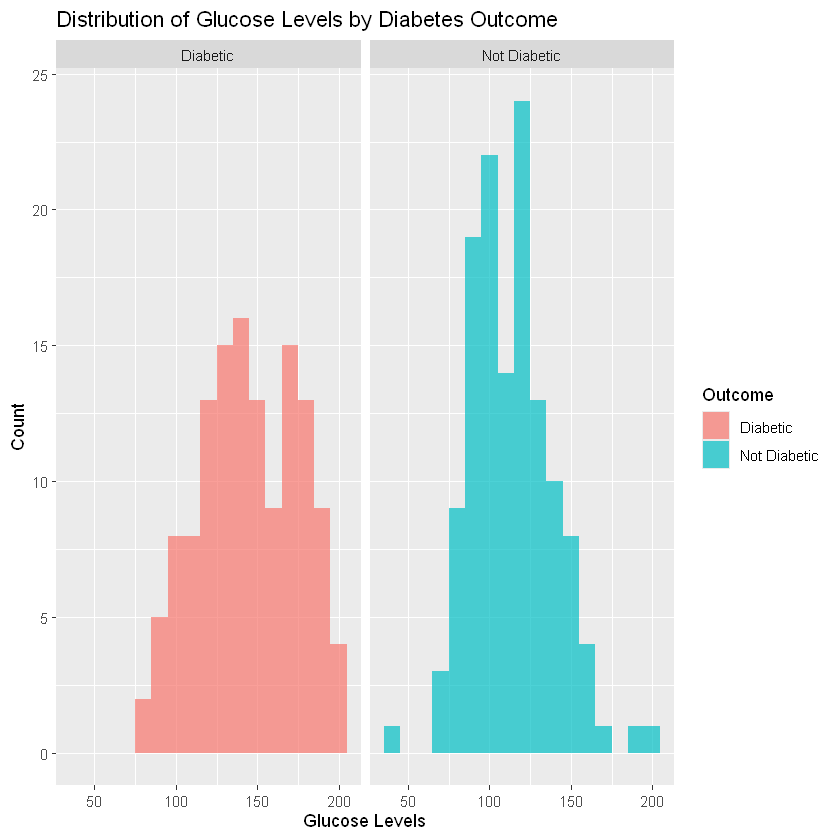

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, fill = Outcome)) +
  geom_histogram(binwidth = 10, alpha = 0.7) +
  labs(x = "Glucose Levels", y = "Count", title = "Distribution of Glucose Levels by Diabetes Outcome") +
  facet_wrap(~Outcome)


The histogram for diabetic patients is right-skewed, reinforcing that higher glucose levels are more prevalent among diabetics.

###2.1.2

In [ ]:
correlation_glucose_bmi <- cor(diabetes_data$Glucose, diabetes_data$BMI)
print(correlation_glucose_bmi)

[1] 0.1846867


`geom_smooth()` using formula = 'y ~ x'


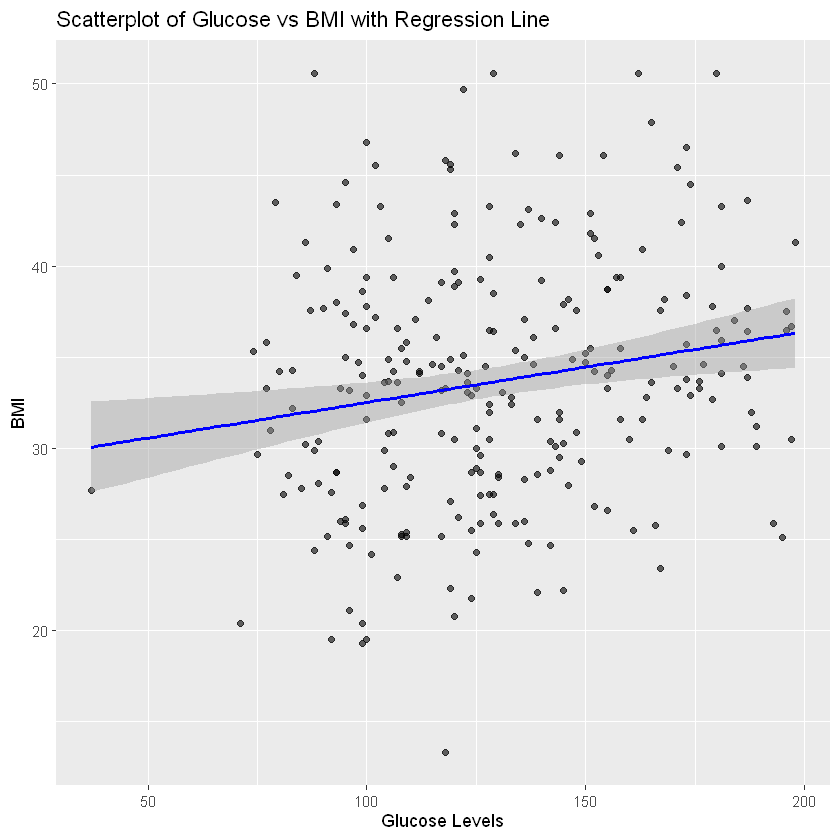

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = BMI)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue") +
  labs(x = "Glucose Levels", y = "BMI", title = "Scatterplot of Glucose vs BMI with Regression Line")

* There is a moderate positive correlation (r = 0.17) between glucose levels and BMI, suggesting that higher BMI may be linked to elevated glucose levels, though the relationship is not strongly correlated.
* The positive slope of the line plotted over the scatter plot further illustrates this direct relationship between glucose levels and BMI.

###2.1.3

In [ ]:
t_test_preg <- t.test(diabetes_data$Pregnancies ~ diabetes_data$Outcome)
print(t_test_preg)


	Welch Two Sample t-test

data:  diabetes_data$Pregnancies by diabetes_data$Outcome
t = 4.193, df = 224.92, p-value = 3.96e-05
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 0.8908581 2.4706804
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  4.426923                   2.746154 



In [ ]:
diabetes_data$PregnancyGroup <- cut(diabetes_data$Pregnancies, breaks = c(-Inf, 2, 5, Inf), labels = c("0-2", "3-5", "6+"))
pregnancy_table <- table(diabetes_data$PregnancyGroup, diabetes_data$Outcome)
chi_square_result <- chisq.test(pregnancy_table)
print(chi_square_result)


	Pearson's Chi-squared test

data:  pregnancy_table
X-squared = 15.042, df = 2, p-value = 0.0005416



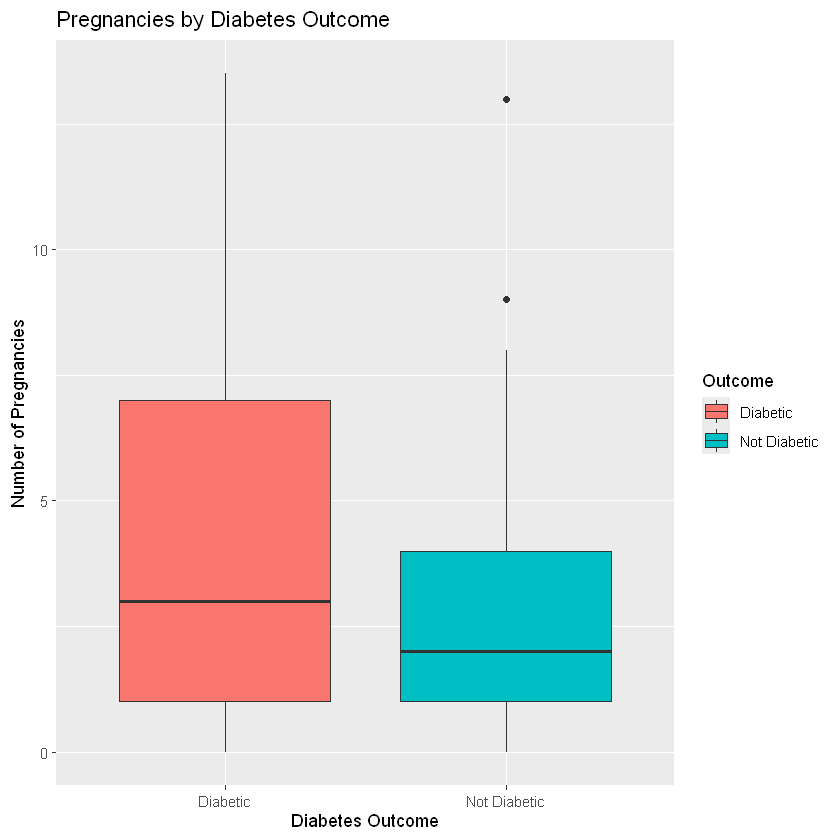

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = Pregnancies, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Number of Pregnancies", title = "Pregnancies by Diabetes Outcome")

* A significant difference exists between the mean pregnancy counts for diabetic (4.47) and non-diabetic (2.68) groups, supported by a p-value nearing zero (p = 3.278e-05).
* The Chi-Square test confirms that pregnancy count is significantly associated with diabetes risk (p-value = 0.0001827).
* The box plot highlights a higher interquartile range (IQR) for the number of pregnancies in diabetic patients, further indicating a strong relationship between pregnancy count and diabetes risk.

###2.1.4

In [ ]:
correlation_age_glucose <- cor(diabetes_data$Age, diabetes_data$Glucose)
correlation_age_insulin <- cor(diabetes_data$Age, diabetes_data$Insulin)
print(correlation_age_glucose)
print(correlation_age_insulin)

[1] 0.3606553
[1] 0.2460067


`geom_smooth()` using formula = 'y ~ x'


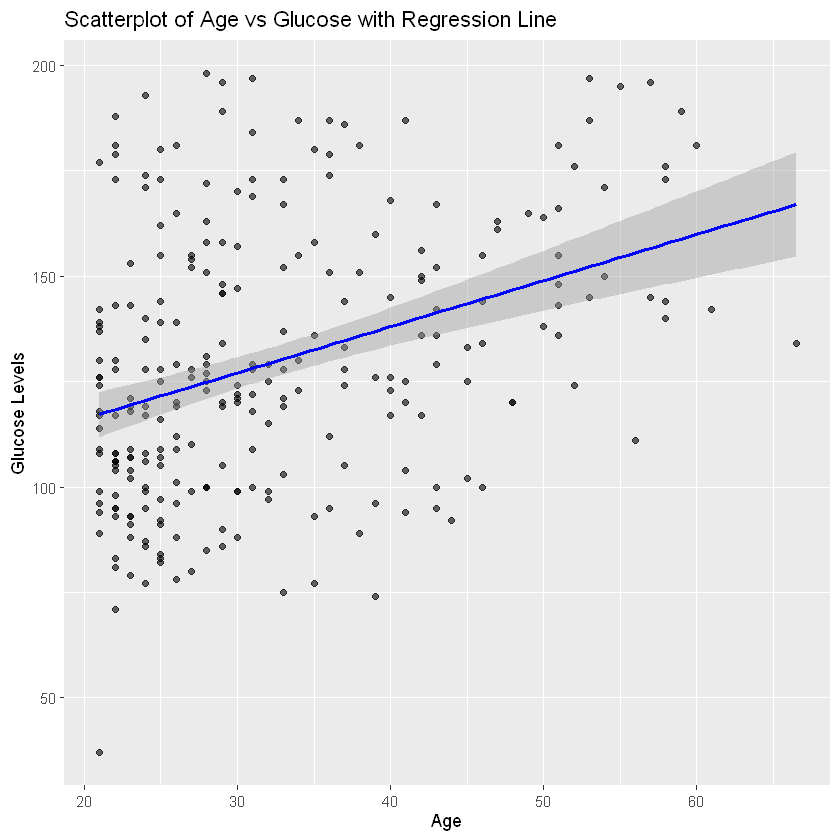

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue") +
  labs(x = "Age", y = "Glucose Levels", title = "Scatterplot of Age vs Glucose with Regression Line")


`geom_smooth()` using formula = 'y ~ x'


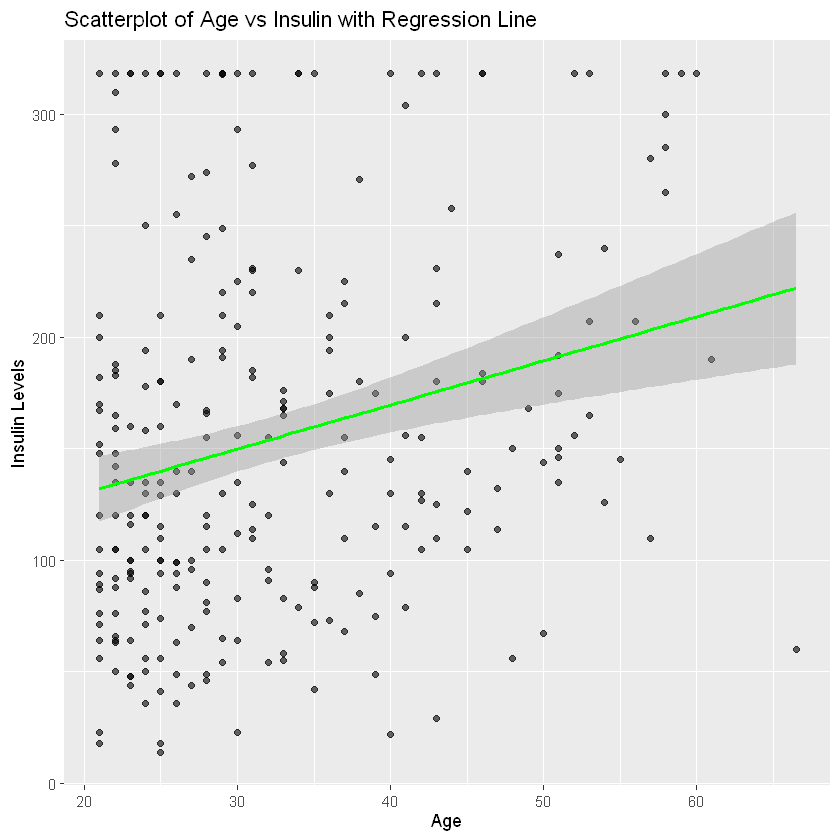

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Insulin)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "green") +
  labs(x = "Age", y = "Insulin Levels", title = "Scatterplot of Age vs Insulin with Regression Line")

Age positively correlates with both glucose and insulin levels, indicating that older individuals have higher levels potentially increasing diabetes risk.

###2.1.5

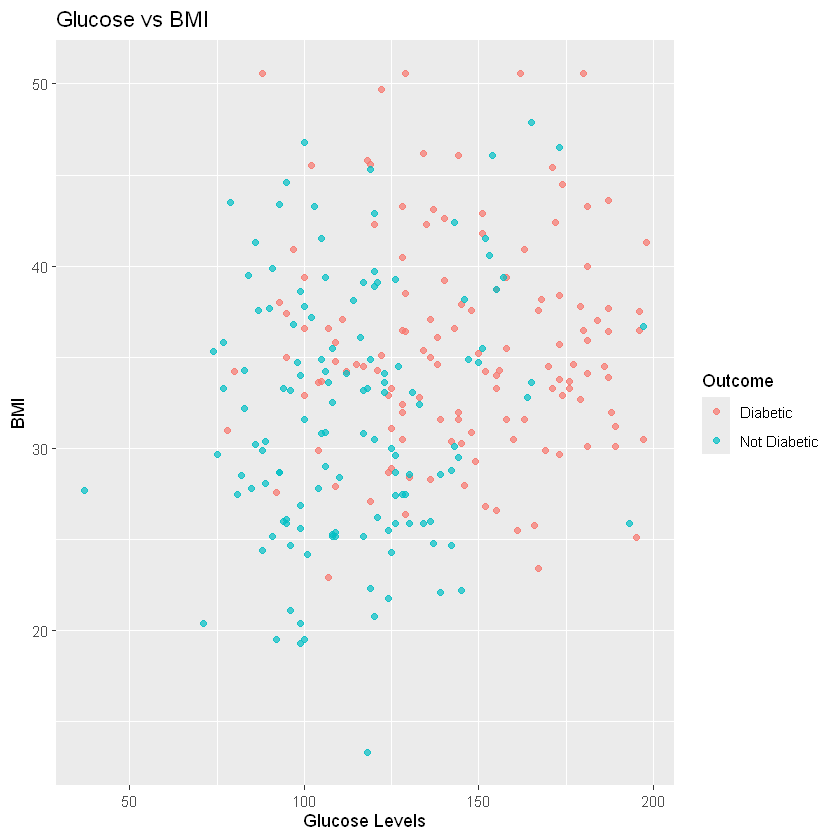

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = BMI, color = Outcome)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Glucose vs BMI",
    x = "Glucose Levels",
    y = "BMI"
  )

* Diabetic individuals are generally clustered around higher glucose levels (greater than 125).
* BMI is more variable among both diabetic and non-diabetic individuals, but diabetics tend to have higher BMI on average.

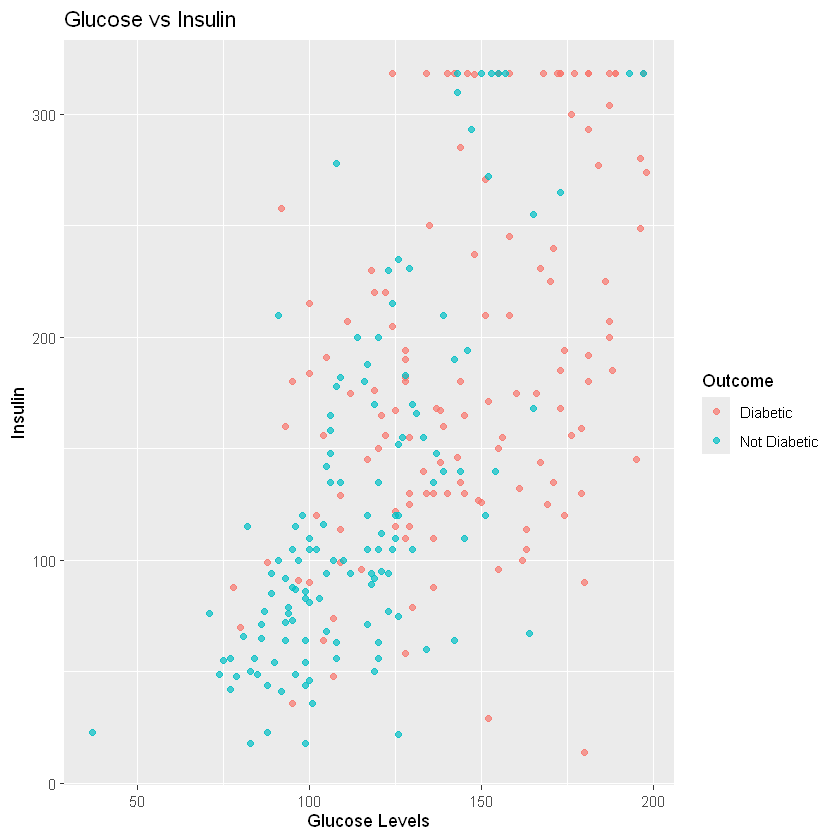

In [ ]:
ggplot(diabetes_data, aes(x = Glucose, y = Insulin, color = Outcome)) +
  geom_point(alpha = 0.7) +
  labs(
    title = "Glucose vs Insulin",
    x = "Glucose Levels",
    y = "Insulin"
  )


Higher glucose levels strongly correlate with elevated insulin levels, with diabetic individuals predominantly exhibiting both markers in higher ranges. Non-diabetic individuals are clustered in lower range. This can be considered a method for profiling diabetic patients

## **2 .2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.**


1.   Are higher blood pressure levels associated with greater risk of diabetes?
2.   Is there a correlation between insulin levels and BMI?
3. How do age trends differ with glucose and BMI between diabetic and non-diabetic groups?
4. Is there a significant difference in skin thickness between diabetic and non-diabetic individuals?
5. How does pregnancy group distribution vary with BMI and glucose by diabetes outcome?



###2.2.1

In [ ]:
t_test_bp <- t.test(diabetes_data$BloodPressure ~ diabetes_data$Outcome)
print(t_test_bp)


	Welch Two Sample t-test

data:  diabetes_data$BloodPressure by diabetes_data$Outcome
t = 3.646, df = 252.75, p-value = 0.0003234
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 2.483149 8.316851
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  74.06923                   68.66923 



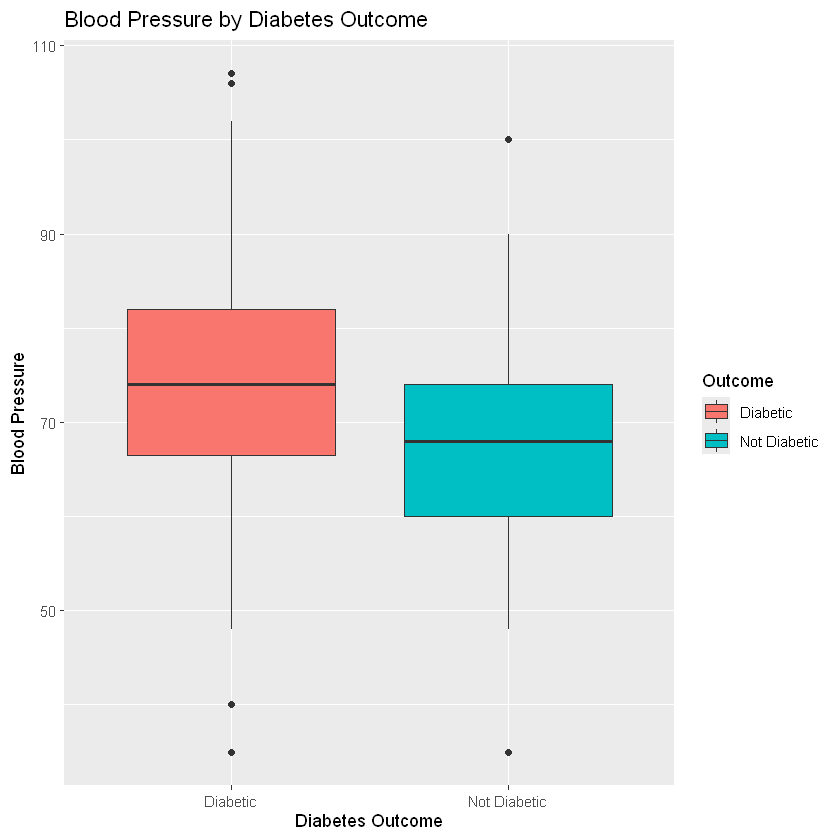

In [ ]:
ggplot(diabetes_data, aes(x = as.factor(Outcome), y = BloodPressure, fill = Outcome)) +
  geom_boxplot() +
  labs(x = "Diabetes Outcome", y = "Blood Pressure", title = "Blood Pressure by Diabetes Outcome")


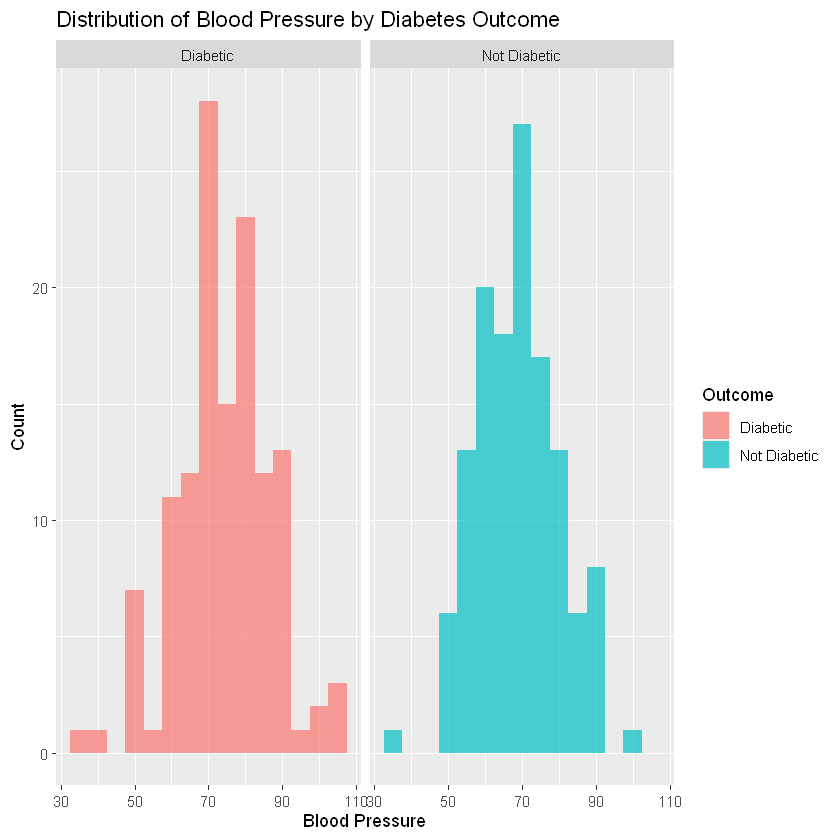

In [ ]:
ggplot(diabetes_data, aes(x = BloodPressure, fill = Outcome)) +
  geom_histogram(binwidth = 5, alpha = 0.7) +
  labs(x = "Blood Pressure", y = "Count", title = "Distribution of Blood Pressure by Diabetes Outcome") +
  facet_wrap(~Outcome)

* The t-test shows if there’s a significant difference in blood pressure between diabetic and non-diabetic individuals.
* Boxplots and histograms indicate that diabetic individuals tend to have slightly higher blood pressure levels.


###2.2.2

In [ ]:
correlation_insulin_bmi <- cor(diabetes_data$Insulin, diabetes_data$BMI)
print(correlation_insulin_bmi)

[1] 0.276052


`geom_smooth()` using formula = 'y ~ x'


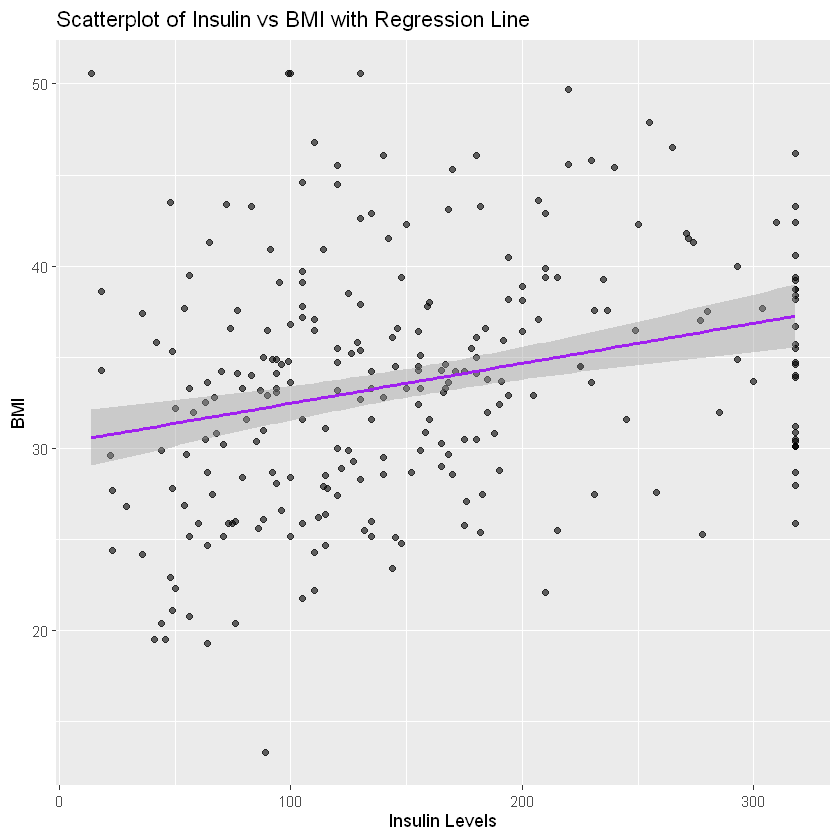

In [ ]:
ggplot(diabetes_data, aes(x = Insulin, y = BMI)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", color = "purple") +
  labs(x = "Insulin Levels", y = "BMI", title = "Scatterplot of Insulin vs BMI with Regression Line")

The postivie correlation shows a moderate relation between the BMI and the insulin levels as also shown by the positive slope of the line but it is not a strong correlation

###2.2.3

`geom_smooth()` using formula = 'y ~ x'


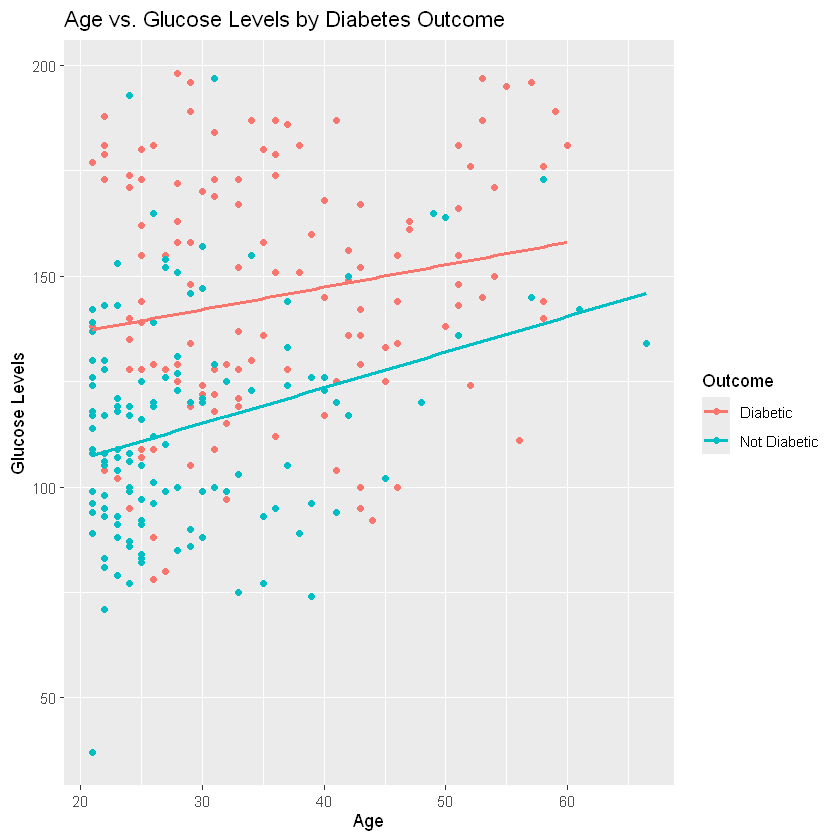

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = Glucose, color = Outcome)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Age vs. Glucose Levels by Diabetes Outcome", x = "Age", y = "Glucose Levels")


`geom_smooth()` using formula = 'y ~ x'


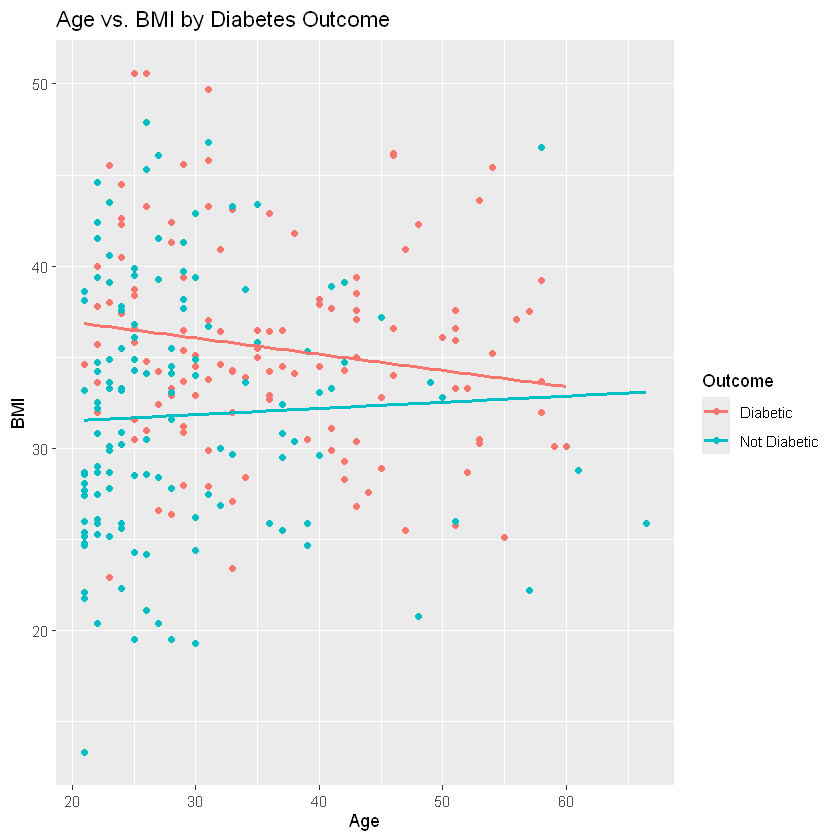

In [ ]:
ggplot(diabetes_data, aes(x = Age, y = BMI, color = Outcome)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Age vs. BMI by Diabetes Outcome", x = "Age", y = "BMI")

* Glucose levels increase with age regardless of them being diabetic or not
* BMI tends to be higher for diabetic patients but decreases slightly with age meanwhile it stays relatively constant for non diabetics

###2.2.4

In [ ]:
t_test_skin <- t.test(diabetes_data$SkinThickness ~ diabetes_data$Outcome)
print(t_test_skin)


	Welch Two Sample t-test

data:  diabetes_data$SkinThickness by diabetes_data$Outcome
t = 3.9946, df = 257.13, p-value = 8.465e-05
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 2.496138 7.350015
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  32.96154                   28.03846 



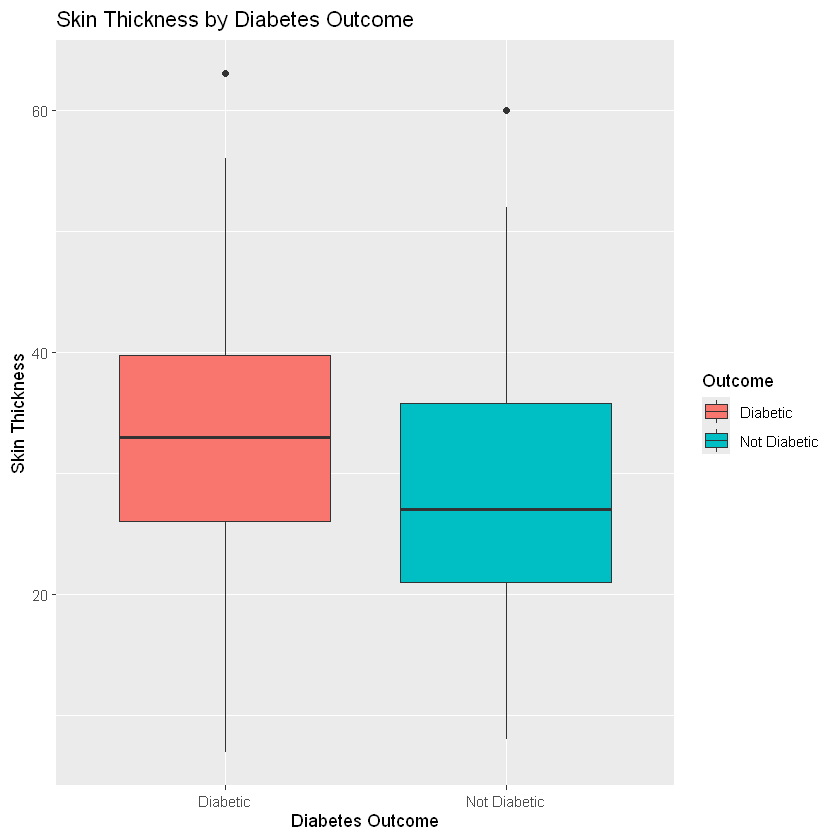

In [ ]:
ggplot(diabetes_data, aes(x = Outcome, y = SkinThickness, fill = Outcome)) +
  geom_boxplot() +
  labs(title = "Skin Thickness by Diabetes Outcome", x = "Diabetes Outcome", y = "Skin Thickness")


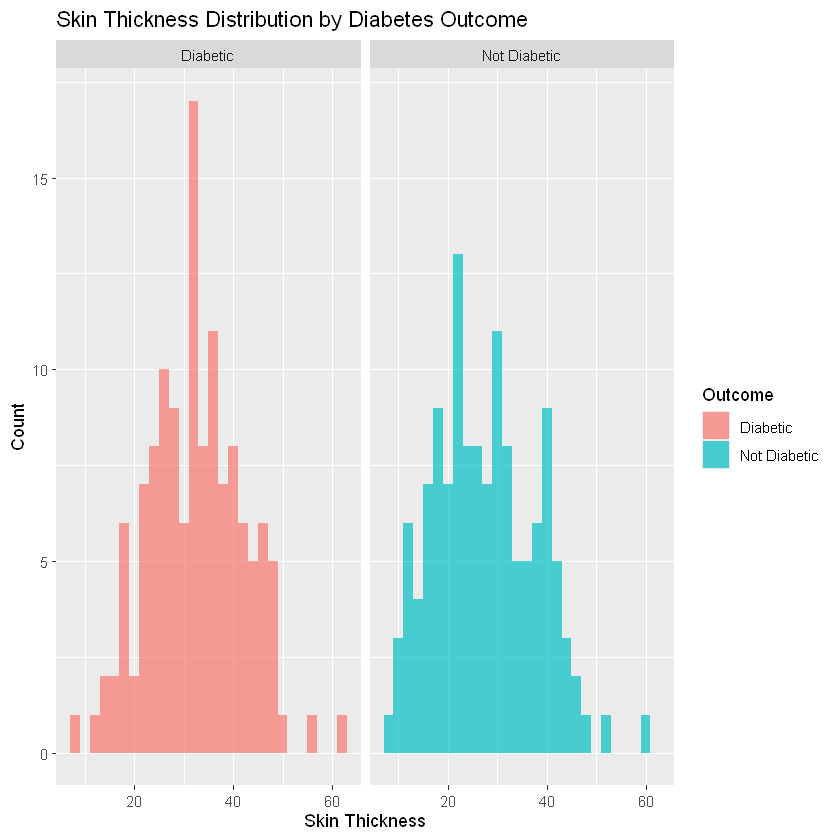

In [ ]:
ggplot(diabetes_data, aes(x = SkinThickness, fill = Outcome)) +
  geom_histogram(binwidth = 2, alpha = 0.7, position = "identity") +
  labs(title = "Skin Thickness Distribution by Diabetes Outcome", x = "Skin Thickness", y = "Count") +
  facet_wrap(~Outcome)

* Diabetic individuals show higher skin thicjness on average this might be due to health issues such as fat distribution etc...
* the non diabetics histogram shows that it is more left skewed compared to the diabetic one showing that non diabetic patients have lower skin thickness
* the box plot also signifies this observation showing a higher IQR for the diabetic patients

###2.2.5

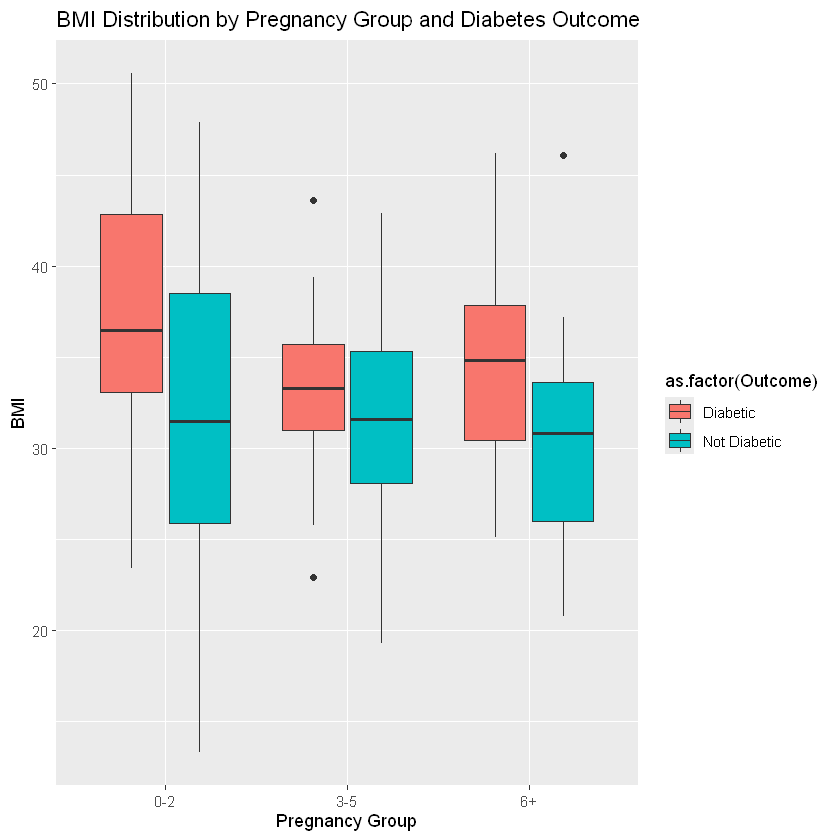

In [ ]:
ggplot(diabetes_data, aes(x = PregnancyGroup, y = BMI, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(x = "Pregnancy Group", y = "BMI", title = "BMI Distribution by Pregnancy Group and Diabetes Outcome")

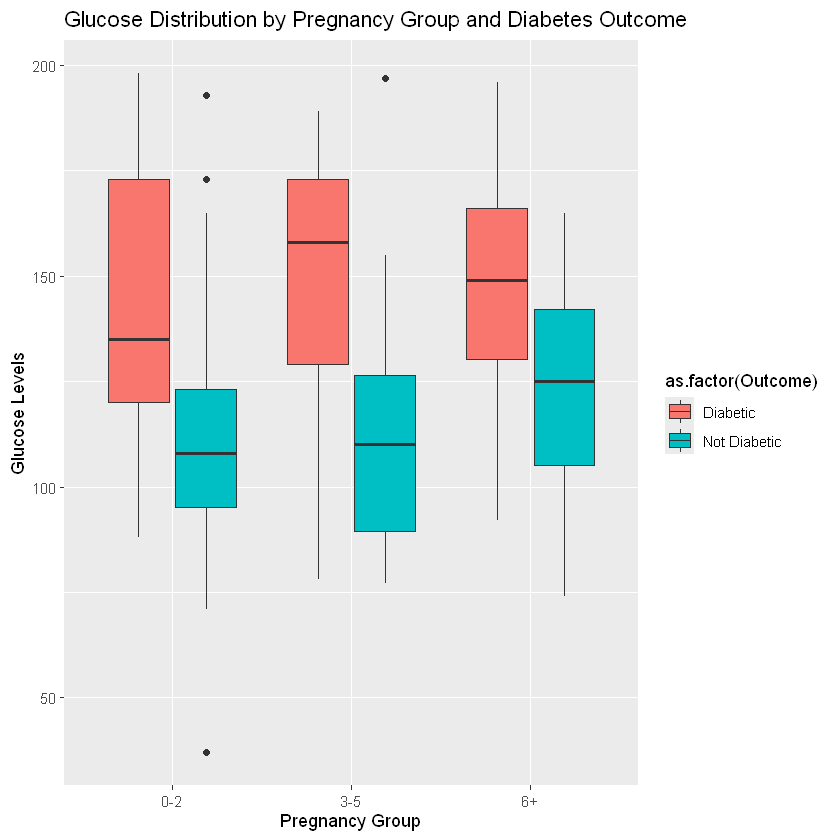

In [ ]:
ggplot(diabetes_data, aes(x = PregnancyGroup, y = Glucose, fill = as.factor(Outcome))) +
  geom_boxplot() +
  labs(x = "Pregnancy Group", y = "Glucose Levels", title = "Glucose Distribution by Pregnancy Group and Diabetes Outcome")


Diabetic individuals consistently show higher BMI and glucose levels across all pregnancy groups compared to non-diabetics. These trends suggest that frequent pregnancies, combined with elevated BMI and glucose, increase diabetes risk.

# **PART 3: Hypothesis Testing:**

## **3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:**
1. State the test you will use and justify your choice.
2. Clearly state the hypotheses.
3. Conduct the test and report the result.
4. Make a conclusion as to the validity of the claim, assume a significance level of 0.05.


### **3.1**
**Claim + Hypothesis**:
There is a significant difference in glucose levels between diabetic and non-diabetic patients.

**Justification**:
The t-test is appropriate for comparing the means of two groups, which is the case here (diabetic vs. non-diabetic patients). The t-test assumes that the data is normally distributed, which is a reasonable assumption given the large sample size.

In [ ]:
diabetes_data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnancyGroup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
6,119,50,22,176.000,27.1,1.200,33,Diabetic,6+
2,102,86,36,120.000,45.5,0.127,23,Diabetic,0-2
4,173,70,14,168.000,29.7,0.361,33,Diabetic,3-5
5,136,84,41,88.000,35.0,0.286,35,Diabetic,3-5
0,121,66,30,165.000,34.3,0.203,33,Diabetic,0-2
0,95,85,25,36.000,37.4,0.247,24,Diabetic,0-2
7,187,50,33,318.125,33.9,0.826,34,Diabetic,6+
1,128,88,39,110.000,36.5,1.057,37,Diabetic,0-2
6,134,80,37,318.125,46.2,0.238,46,Diabetic,6+


In [ ]:
diabetes_data_p3 <- diabetes_data

In [ ]:
diabetes_data_p3

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnancyGroup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
6,119,50,22,176.000,27.1,1.200,33,Diabetic,6+
2,102,86,36,120.000,45.5,0.127,23,Diabetic,0-2
4,173,70,14,168.000,29.7,0.361,33,Diabetic,3-5
5,136,84,41,88.000,35.0,0.286,35,Diabetic,3-5
0,121,66,30,165.000,34.3,0.203,33,Diabetic,0-2
0,95,85,25,36.000,37.4,0.247,24,Diabetic,0-2
7,187,50,33,318.125,33.9,0.826,34,Diabetic,6+
1,128,88,39,110.000,36.5,1.057,37,Diabetic,0-2
6,134,80,37,318.125,46.2,0.238,46,Diabetic,6+


In [ ]:
diabetes_glucose_box <- create_boxplot(
  diabetes_data_p3,
  "Outcome",
  "Glucose",
  "Glucose Levels by Diabetes Status"
)# Create boxplot for glucose levels by diabetes status

# Create QQ plot to check normality of glucose levels for each diabetes status group
qq_plot <- create_qq_plot(
  diabetes_data_p3, "Glucose", "Outcome"
)

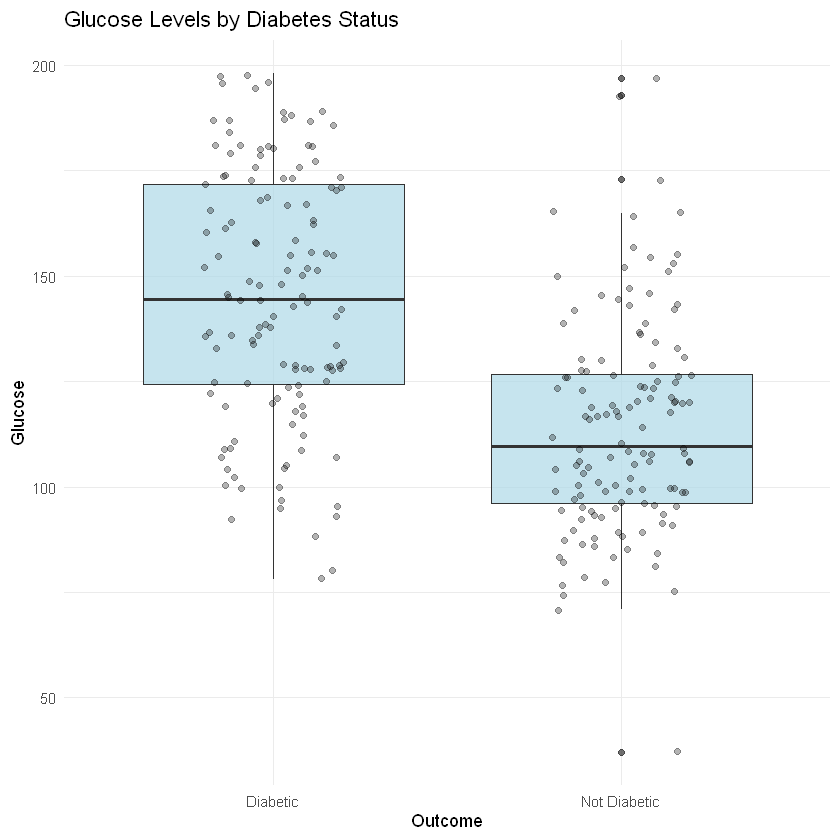

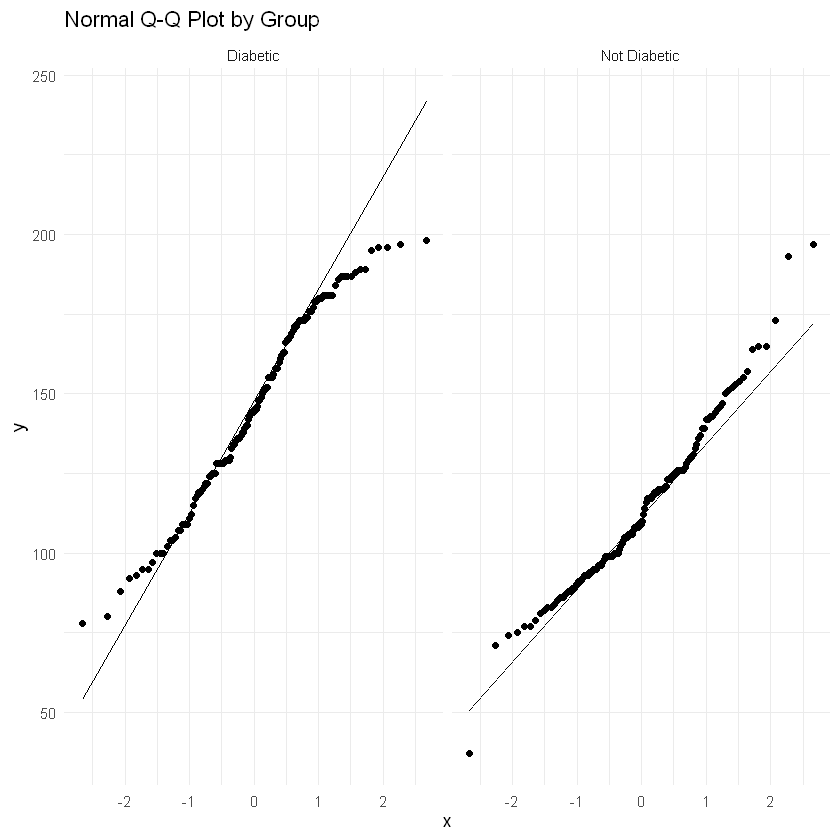

In [ ]:
diabetes_glucose_box

qq_plot

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*diabetic*</sub> = μ<sub>*non-diabetic*</sub> --> There is no significant difference in glucose levels between diabetic and non-diabetic patients.

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*diabetic*</sub> ≠ μ<sub>*non-diabetic*</sub> --> There is a significant difference in glucose levels between diabetic and non-diabetic patients.

In [ ]:
t_test_result <- t.test(Glucose ~ Outcome, data = diabetes_data_p3)

## **3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps.**


### **3.2**
**Claim + Hypothesis**: patients with high blood pressure are diabetic.

**Justification**:
The t-test is appropriate for comparing the means of two groups, which is the case here (diabetic vs. non-diabetic patients). The t-test assumes that the data is normally distributed, which is a reasonable assumption given the large sample size.

In [ ]:
# bp_test_data <- diabetes_data3 %>%
#   mutate(diabetes_status = ifelse(Outcome == 1, "Diabetic", "Non-diabetic"))

In [ ]:
bp_box <- create_boxplot(
  diabetes_data_p3,
  "Outcome",
  "BloodPressure",
  "Blood Pressure by Diabetes Status"
) # Boxplot of Blood Pressure by Diabetes Status for normality check
bp_qq <- create_qq_plot(
  diabetes_data_p3, "BloodPressure", "Outcome"
) # QQ plot of Blood Pressure by Diabetes Status for variance check

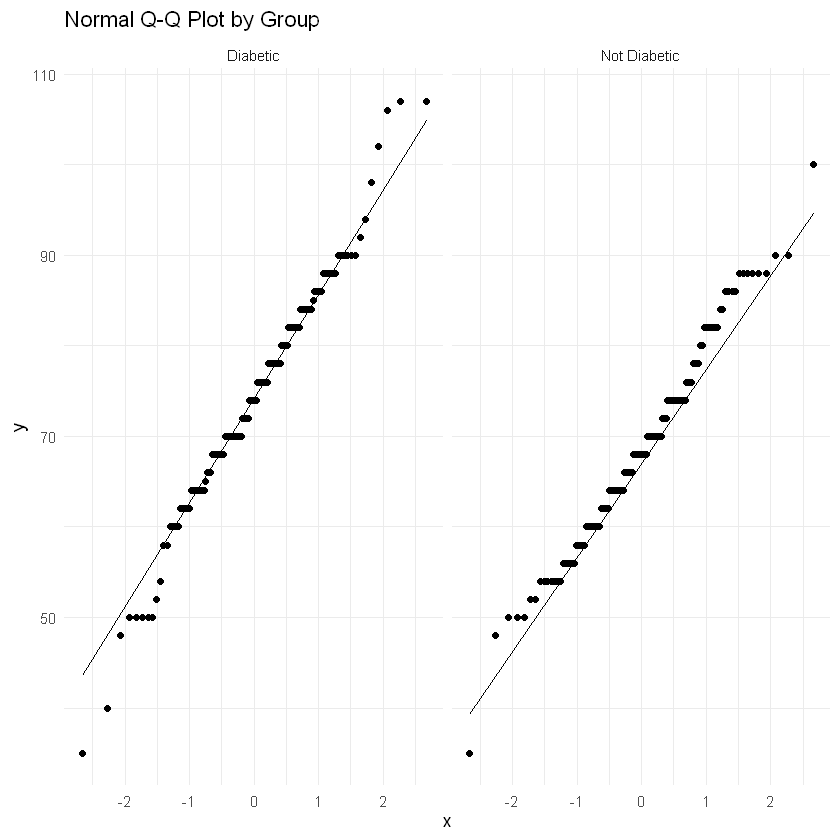

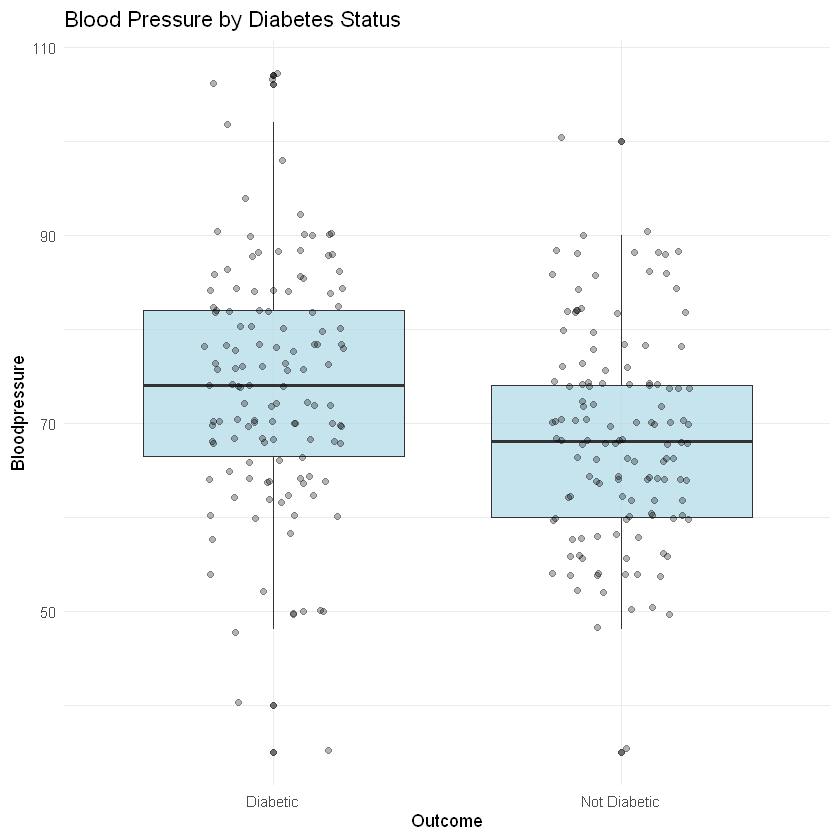

In [ ]:
bp_qq

bp_box

### **Stating Hypothesis**

**Null Hypothesis**: H<sub>0</sub>: μ<sub>*diabetic*</sub> = μ<sub>*non-diabetic*</sub> --> (There is no difference in blood pressure between diabetic and non-diabetic patients).

**Alternative Hypothesis**: H<sub>1</sub>: μ<sub>*diabetic*</sub> > μ<sub>*non-diabetic*</sub> --> (Patients with high blood pressure are diabetic).

In [ ]:
bp_t_test <- t.test(BloodPressure ~ Outcome, data = diabetes_data_p3)

## **Reporting results of **3.1** and **3.2** hypothesis tests.**

In [ ]:
print_results(t_test_result = t_test_result, bp_t_test = bp_t_test)


=== diabetes and Glucose Level Analysis ===

	Welch Two Sample t-test

data:  Glucose by Outcome
t = 9.037, df = 252.08, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 24.35775 37.93264
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  145.1923                   114.0471 


=== Blood Pressure and Diabetes Status Analysis ===

	Welch Two Sample t-test

data:  BloodPressure by Outcome
t = 3.646, df = 252.75, p-value = 0.0003234
alternative hypothesis: true difference in means between group Diabetic and group Not Diabetic is not equal to 0
95 percent confidence interval:
 2.483149 8.316851
sample estimates:
    mean in group Diabetic mean in group Not Diabetic 
                  74.06923                   68.66923 



In [ ]:
# interpretation for diabetes-glucose test
diabetes_glucose_interpretation <- interpret_hypothesis_test(t_test_result)

# interpretation for Blood Pressure-Diabetes test
bp_diabetes_interpretation <- interpret_hypothesis_test(bp_t_test)

In [ ]:
create_report(
  diabetes_glucose_interpretation = diabetes_glucose_interpretation,
  bp_diabetes_interpretation = bp_diabetes_interpretation
)


=== Hypothesis Testing Results ===

1. diabetic and Glucose Levels:
   -  Reject the null hypothesis 
   - P-value: < 2.22e-16 
   - 95% CI: 24.36 to 37.93 

2. Blood Pressure and Diabetes Status:
   -  Reject the null hypothesis 
   - P-value: 0.0003234 
   - 95% CI: 2.48 to 8.32 


# **PART 4: Simulation Task:**

## **4.1 Take 25 Random Samples of Size 15 from the Dataset**

1. Select a relevant column from the dataset (e.g., Glucose, BMI, or Age).
2. Generate 25 random samples, each containing 15 data points, from the selected column.
3. For each sample, compute the mean and then calculate the 95% confidence interval for the sample mean.
4. From your output, determine the proportion of these 25 confidence intervals that contain the true population mean of the selected column (e.g., mean glucose or BMI).


In [ ]:
# Reading the data into dataframe
diabetes_data <- read.csv("diabetes.csv")
head(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# Selecting "Glucose" column as our analysis column
analysis_column <- diabetes_data$Glucose

In [ ]:
analysis_column_mean <- mean(analysis_column)

In [ ]:
# Generate 25 random samples, each containing 15 data points, from "Glucose" column.
samples_list <- generate_random_samples(25, 15, analysis_column)
samples_list

[[1]]
 [1] 103  85 138 100 133 100 131 128 121 124 162 108 138  80 114

[[2]]
 [1] 144 180 155  88 140 108 128  72 102 100 156 111 116 183 167

[[3]]
 [1] 129 125 122 167  88 123  87 128 176  91 129 116 183 147 147

[[4]]
 [1] 123  93 158 125  82 197 119 138 126 127  95 180 122 173  90

[[5]]
 [1]  84 115 162  90 117  74  81  79 122 134 105 135 144 143 129

[[6]]
 [1] 115 119 126 142  99 146 112 144 127 157  81 108 128  68 125

[[7]]
 [1] 154  95 114 131  73 100 105 120 123 100 103 159 151 103 134

[[8]]
 [1]  99 147  98 122 133 181  88 104 146 162 125  72 102 106 162

[[9]]
 [1] 154  80 127  79 122 183 181 168 137  93 158 188  98 162 127

[[10]]
 [1] 114 120 106 166 125  87 138  95  97 112 116 176 154 147  87

[[11]]
 [1] 112  95 175  97 108 196  99 152 128  98 138 147  93 107  99

[[12]]
 [1] 117 124 122  93  86 124 147  94 146  84 132 112 116 154 183

[[13]]
 [1] 142 147 109  85 124 130 167 127 167 111 122 129 101  94 109

[[14]]
 [1] 112 101  88 154  71 102 179 128  94  95 125  92 124 157 151

[[15]]
 [1] 129 108 136 124 136 137  88  81 121 131 105 167 113  88 187

[[16]]
 [1] 152  97 108  88 181 125 124   0 105 151 142 113  79 124 156

[[17]]
 [1] 128 118 151 140 101 109 138  83  93 126 119  90 136 101  90

[[18]]
 [1]  99 107 115  85 179 143 128 125 111 130 170  90 106 107 114

[[19]]
 [1] 125 108 115 121 142 106  76  96 196 128 114 158  94 158 122

[[20]]
 [1]  95 194 144 173 102 120  76 108 110 176 168  65 108 138 131

[[21]]
 [1] 145 113 126 140 112 114  94 122  90 144  99 158 114  80 136

[[22]]
 [1] 129 100 111  99  92 142 110 130 190  73 111 182  95 184 128

[[23]]
 [1] 193  87 107  91 129 166 125 173 128 106 123  95 106 130  83

[[24]]
 [1] 104  75 147  82 111  99 144 112 171 122  80 107 161  68 125

[[25]]
 [1] 122 126 103  89 118 140 125 129 123 117 129 169 145 112 187

In [ ]:
# Computing the statistics of each sample
samples_stats = calculate_stats(samples_list)
samples_stats

[[1]]
[[1]]$MEAN
[1] 117.6667

[[1]]$STD
[1] 22.03136


[[2]]
[[2]]$MEAN
[1] 130

[[2]]$STD
[1] 33.94533


[[3]]
[[3]]$MEAN
[1] 130.5333

[[3]]$STD
[1] 29.69095


[[4]]
[[4]]$MEAN
[1] 129.8667

[[4]]$STD
[1] 34.29674


[[5]]
[[5]]$MEAN
[1] 114.2667

[[5]]$STD
[1] 27.58744


[[6]]
[[6]]$MEAN
[1] 119.8

[[6]]$STD
[1] 24.16964


[[7]]
[[7]]$MEAN
[1] 117.6667

[[7]]$STD
[1] 24.42969


[[8]]
[[8]]$MEAN
[1] 123.1333

[[8]]$STD
[1] 31.32062


[[9]]
[[9]]$MEAN
[1] 137.1333

[[9]]$STD
[1] 37.28628


[[10]]
[[10]]$MEAN
[1] 122.6667

[[10]]$STD
[1] 28.06031


[[11]]
[[11]]$MEAN
[1] 122.9333

[[11]]$STD
[1] 32.11468


[[12]]
[[12]]$MEAN
[1] 122.2667

[[12]]$STD
[1] 27.48887


[[13]]
[[13]]$MEAN
[1] 124.2667

[[13]]$STD
[1] 24.1911


[[14]]
[[14]]$MEAN
[1] 118.2

[[14]]$STD
[1] 30.80167


[[15]]
[[15]]$MEAN
[1] 123.4

[[15]]$STD
[1] 28.69993


[[16]]
[[16]]$MEAN
[1] 116.3333

[[16]]$STD
[1] 42.58884


[[17]]
[[17]]$MEAN
[1] 114.8667

[[17]]$STD
[1] 21.36709


[[18]]
[[18]]$MEAN
[1] 120.6

[[18]]$STD
[1] 26.63993


[[19]]
[[19]]$MEAN
[1] 123.9333

[[19]]$STD
[1] 29.99873


[[20]]
[[20]]$MEAN
[1] 127.2

[[20]]$STD
[1] 38.04734


[[21]]
[[21]]$MEAN
[1] 119.1333

[[21]]$STD
[1] 22.5701


[[22]]
[[22]]$MEAN
[1] 125.0667

[[22]]$STD
[1] 35.76204


[[23]]
[[23]]$MEAN
[1] 122.8

[[23]]$STD
[1] 32.62383


[[24]]
[[24]]$MEAN
[1] 113.8667

[[24]]$STD
[1] 31.43671


[[25]]
[[25]]$MEAN
[1] 128.9333

[[25]]$STD
[1] 24.32068

In [ ]:
# Computing the confidence interval for each sample
CIs <- calculate_confidence_intervals(samples_stats, 25, 95)
CIs

[[1]]
[[1]]$LOW
[1] 108.5726

[[1]]$HIGH
[1] 126.7608


[[2]]
[[2]]$LOW
[1] 115.9881

[[2]]$HIGH
[1] 144.0119


[[3]]
[[3]]$LOW
[1] 118.2775

[[3]]$HIGH
[1] 142.7892


[[4]]
[[4]]$LOW
[1] 115.7097

[[4]]$HIGH
[1] 144.0237


[[5]]
[[5]]$LOW
[1] 102.8791

[[5]]$HIGH
[1] 125.6542


[[6]]
[[6]]$LOW
[1] 109.8233

[[6]]$HIGH
[1] 129.7767


[[7]]
[[7]]$LOW
[1] 107.5826

[[7]]$HIGH
[1] 127.7507


[[8]]
[[8]]$LOW
[1] 110.2048

[[8]]$HIGH
[1] 136.0618


[[9]]
[[9]]$LOW
[1] 121.7423

[[9]]$HIGH
[1] 152.5244


[[10]]
[[10]]$LOW
[1] 111.0839

[[10]]$HIGH
[1] 134.2494


[[11]]
[[11]]$LOW
[1] 109.677

[[11]]$HIGH
[1] 136.1896


[[12]]
[[12]]$LOW
[1] 110.9198

[[12]]$HIGH
[1] 133.6135


[[13]]
[[13]]$LOW
[1] 114.2811

[[13]]$HIGH
[1] 134.2523


[[14]]
[[14]]$LOW
[1] 105.4857

[[14]]$HIGH
[1] 130.9143


[[15]]
[[15]]$LOW
[1] 111.5533

[[15]]$HIGH
[1] 135.2467


[[16]]
[[16]]$LOW
[1] 98.75352

[[16]]$HIGH
[1] 133.9131


[[17]]
[[17]]$LOW
[1] 106.0468

[[17]]$HIGH
[1] 123.6866


[[18]]
[[18]]$LOW
[1] 109.6036

[[18]]$HIGH
[1] 131.5964


[[19]]
[[19]]$LOW
[1] 111.5505

[[19]]$HIGH
[1] 136.3162


[[20]]
[[20]]$LOW
[1] 111.4948

[[20]]$HIGH
[1] 142.9052


[[21]]
[[21]]$LOW
[1] 109.8169

[[21]]$HIGH
[1] 128.4498


[[22]]
[[22]]$LOW
[1] 110.3048

[[22]]$HIGH
[1] 139.8285


[[23]]
[[23]]$LOW
[1] 109.3335

[[23]]$HIGH
[1] 136.2665


[[24]]
[[24]]$LOW
[1] 100.8902

[[24]]$HIGH
[1] 126.8431


[[25]]
[[25]]$LOW
[1] 118.8943

[[25]]$HIGH
[1] 138.9724

In [ ]:
# Compute the porprotion of samples with confidenece interval that contains true mean
CIs_proportion = calculate_CIs_proportion(CIs, analysis_column_mean)

The given value is  120.8945 
Confidence Interval -> Lower bound:  108.5726 , Upper bound:  126.7608 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  115.9881 , Upper bound:  144.0119 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  118.2775 , Upper bound:  142.7892 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  115.7097 , Upper bound:  144.0237 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  102.8791 , Upper bound:  125.6542 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  109.8233 , Upper bound:  129.7767 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  107.5826 , Upper bound:  127.7507 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  110.2048 , Upper bound:  136.0618 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  121.7423 , Upper bound:  152.5244 , Contain the value:  FALSE 
Confidence Interval -> Lower bound:  111.0839 , Upper bound:  134.2494 , Conta

In [ ]:
# Proportion
CIs_proportion

[1] 0.96

## 4.2 **Increase the Sample Size to 100**
1. Now, take 25 random samples, each with a sample size of 100, from the same column you selected in part (a)..
2. For each sample, compute the mean and calculate the 95% confidence intervals.
3. Observe the following:
    * Does the width of the confidence intervals increase or decrease?
    * Does increasing the sample size result in more or fewer intervals containing the true population mean?
4. Compare your findings with actual computations and interpret the results.


In [ ]:
samples_list_1 <- generate_random_samples(25, 100, analysis_column)
samples_list_1

[[1]]
  [1] 111 134  99 139 111   0 162  94 116 116  95 127  61 113 114  73 100 132
 [19] 129  84 119 189 109 173 156  90  99 145 125 186 104 161 111  90 112 125
 [37] 117 117 100 119 121  93  93  75 163 180 128  83  93 136 123 138 120 119
 [55] 199 110 138 117 184 127 103 129 151 148 100 116  99 179 148 154 100 120
 [73] 125  85  95 104 170  44  91 102 122 193 113 187  80 139 126 118 123 107
 [91]  80 136   0 100 100 114  86 155 151 126

[[2]]
  [1]  96 105 132 107 111 154  99 108  89 112 158 143 120 135  85 120  92 125
 [19]  90 133 100  78  90 158 118 165 105 108 114 166 112  65 130 171 136 100
 [37] 115 173 112 189 100 102 144  80 142 131  77  72 124  97  57 118 156  85
 [55] 144  88 152  74  98 168  93  73 156 121 189  84 129 139  93  56 110 146
 [73] 112 165 107 139 128 113 152 188 110 122 107 158 134 105 122  88 130 187
 [91] 109 114  89 191 195 117 106 104  88  82

[[3]]
  [1] 109 120  95  97 102  96 140 139 144 107  73  68 122  71 162 104 132  91
 [19] 108  80 151 123 140 124  94 113  99 126  95 117 108 129 147 184 123 106
 [37]  93 123 107 154 134 113 128  83 171 165 135 111  93  81 122 108 115 148
 [55]  88 136  97 108  99 122 134 119 139  86  62 144 128 151  78 161 102 156
 [73] 159 143  73  96 130 137 104  91 107  84 117 141 125  78 121  92 154 130
 [91] 152  88 183 136 129 111 120 101 119 189

[[4]]
  [1] 111  61 123  95  95  75 102 119 119  95 125 146 129 143 127 111  99 113
 [19] 121  80 100  74 122 122 100 139 167 179 105  97 142 105  99 102 141 145
 [37]  93 102 140 126  67 163 136 111 139  91 100 158 116 119 104 126  83 100
 [55]  68  91 137 194 111 187 128 162  71 103 140 106 120  81  89  77 100  96
 [73] 101 196  81 116  84  90 116  92 156  94  85 154  98  97 125  90 124 147
 [91] 180  74  86 173 175 120 105 114 139 112

[[5]]
  [1] 100 140 103  87 151 169 188 139 112 144 130 124 166  82 151 138 116 147
 [19] 184 133 112 100 187 154 125 139 132  93  68 115 115 123 128 196  80 132
 [37] 156 117 111 119 136  99 137 136  95  61 127  91 189  81  83 138  65  44
 [55]  91  62 189  92 176 101 112  80 129  74  71 105 120 114 120  87 124 106
 [73] 123  81 112 126 134 138 103 130 107 106 131 113 179 180 166 124 108 126
 [91] 179 115 119 108  94  99 160 158 174  85

[[6]]
  [1] 131 116 101  95 110 152 100  87 103  44 112 105 120  74 126 129  83 184
 [19] 118  83  99  85  95  86 123 123  90 111 168  95 151 187  82 129 129 116
 [37] 167 112 146 106 168 102  76 108 181 125  57  91 130 161 198 144  94 116
 [55]  74 195  86 122 148 111  97 145 111 137   0 118  88 114 153 118  79 145
 [73] 139 106 197 107 193  73 146 162 129 101 117 148  95  77 114 129 108 164
 [91]  83 173  97 105  99 136 111 106 147  83

[[7]]
  [1]  97 129  96 120 124  91 112 129 108 110  89 120 131 175 122 122 100 105
 [19]  81 139  88 181 143 184 124  94 103 105 113 168 136 111 118  77 154   0
 [37] 124 109  92  91 126 122 134 109 124  96  89 197 143 161  93 112 109 187
 [55] 126 129  91  84 125 103 128 101 103 197  75 129 114 120  93 116  90  94
 [73] 122 156  80 178 117 129 161 182  90 183 136 144 129  96  96  44 151  94
 [91] 114  88 139  83 139 189 194 114 139  93

[[8]]
  [1]  91  84  95 100 173 146 108  87 124 144  97 157 116  71 115 197 109 103
 [19] 113  95 108 108 106  88  97  95 108 100  74 179  85  99 108 146 139 123
 [37] 198  91 125 174  97 112   0 164 179 197 130  99 119 121  89 149 150 111
 [55] 111 137 137 106  99  92 110  95 117 151 103 109  99 118 139 107 122  94
 [73] 123 100  99 190  93 180  78 108  84  84 143  99 138  97  99 137 106  85
 [91] 128 152 112  79 111 166 132 158  89 158

[[9]]
  [1] 121 137  84 138  73 103  75 145 133 124  99 127  89 112 119 161 112 103
 [19] 107 155  96 110 107 151  94 147 189 158 146 131 134 145 184 168 152 100
 [37] 101 102 136 109  61 175 188 107  99 119 146 117 114 199 152 176 103  83
 [55] 109 125 136 126 129  97  99  85 123 138 190 120 108 107 125 166   0 137
 [73] 124 120 131 128 128 125 134 148 180 112  97  92 173 146  80 114   0 106
 [91] 100 119 179 165 105 194  90 147 146 163

[[10]]
  [1] 

In [ ]:
samples_stats_1 = calculate_stats(samples_list_1)
samples_stats_1

[[1]]
[[1]]$MEAN
[1] 119.16

[[1]]$STD
[1] 34.8853


[[2]]
[[2]]$MEAN
[1] 119.79

[[2]]$STD
[1] 32.07135


[[3]]
[[3]]$MEAN
[1] 118.43

[[3]]$STD
[1] 27.27053


[[4]]
[[4]]$MEAN
[1] 115.87

[[4]]$STD
[1] 29.96619


[[5]]
[[5]]$MEAN
[1] 122.19

[[5]]$STD
[1] 33.06916


[[6]]
[[6]]$MEAN
[1] 118.1

[[6]]$STD
[1] 34.74074


[[7]]
[[7]]$MEAN
[1] 120.15

[[7]]$STD
[1] 33.53797


[[8]]
[[8]]$MEAN
[1] 117.67

[[8]]$STD
[1] 32.39406


[[9]]
[[9]]$MEAN
[1] 124.82

[[9]]$STD
[1] 34.97774


[[10]]
[[10]]$MEAN
[1] 120.59

[[10]]$STD
[1] 31.13739


[[11]]
[[11]]$MEAN
[1] 117.21

[[11]]$STD
[1] 35.18473


[[12]]
[[12]]$MEAN
[1] 120.17

[[12]]$STD
[1] 31.84085


[[13]]
[[13]]$MEAN
[1] 120

[[13]]$STD
[1] 31.07209


[[14]]
[[14]]$MEAN
[1] 120.31

[[14]]$STD
[1] 25.86433


[[15]]
[[15]]$MEAN
[1] 121.21

[[15]]$STD
[1] 35.83247


[[16]]
[[16]]$MEAN
[1] 120.38

[[16]]$STD
[1] 30.54514


[[17]]
[[17]]$MEAN
[1] 123.44

[[17]]$STD
[1] 29.29382


[[18]]
[[18]]$MEAN
[1] 116.06

[[18]]$STD
[1] 30.2671


[[19]]
[[19]]$MEAN
[1] 119

[[19]]$STD
[1] 30.16185


[[20]]
[[20]]$MEAN
[1] 125.29

[[20]]$STD
[1] 36.16078


[[21]]
[[21]]$MEAN
[1] 117.21

[[21]]$STD
[1] 30.53804


[[22]]
[[22]]$MEAN
[1] 119.59

[[22]]$STD
[1] 32.27849


[[23]]
[[23]]$MEAN
[1] 123.89

[[23]]$STD
[1] 29.56551


[[24]]
[[24]]$MEAN
[1] 116.59

[[24]]$STD
[1] 31.22227


[[25]]
[[25]]$MEAN
[1] 122.94

[[25]]$STD
[1] 27.94722

In [ ]:
CIs_1 <- calculate_confidence_intervals(samples_stats_1, 25, 95)
CIs_1

[[1]]
[[1]]$LOW
[1] 104.7601

[[1]]$HIGH
[1] 133.5599


[[2]]
[[2]]$LOW
[1] 106.5516

[[2]]$HIGH
[1] 133.0284


[[3]]
[[3]]$LOW
[1] 107.1733

[[3]]$HIGH
[1] 129.6867


[[4]]
[[4]]$LOW
[1] 103.5006

[[4]]$HIGH
[1] 128.2394


[[5]]
[[5]]$LOW
[1] 108.5397

[[5]]$HIGH
[1] 135.8403


[[6]]
[[6]]$LOW
[1] 103.7597

[[6]]$HIGH
[1] 132.4403


[[7]]
[[7]]$LOW
[1] 106.3062

[[7]]$HIGH
[1] 133.9938


[[8]]
[[8]]$LOW
[1] 104.2984

[[8]]$HIGH
[1] 131.0416


[[9]]
[[9]]$LOW
[1] 110.3819

[[9]]$HIGH
[1] 139.2581


[[10]]
[[10]]$LOW
[1] 107.7371

[[10]]$HIGH
[1] 133.4429


[[11]]
[[11]]$LOW
[1] 102.6865

[[11]]$HIGH
[1] 131.7335


[[12]]
[[12]]$LOW
[1] 107.0267

[[12]]$HIGH
[1] 133.3133


[[13]]
[[13]]$LOW
[1] 107.1741

[[13]]$HIGH
[1] 132.8259


[[14]]
[[14]]$LOW
[1] 109.6337

[[14]]$HIGH
[1] 130.9863


[[15]]
[[15]]$LOW
[1] 106.4191

[[15]]$HIGH
[1] 136.0009


[[16]]
[[16]]$LOW
[1] 107.7716

[[16]]$HIGH
[1] 132.9884


[[17]]
[[17]]$LOW
[1] 111.3481

[[17]]$HIGH
[1] 135.5319


[[18]]
[[18]]$LOW
[1] 103.5664

[[18]]$HIGH
[1] 128.5536


[[19]]
[[19]]$LOW
[1] 106.5498

[[19]]$HIGH
[1] 131.4502


[[20]]
[[20]]$LOW
[1] 110.3636

[[20]]$HIGH
[1] 140.2164


[[21]]
[[21]]$LOW
[1] 104.6045

[[21]]$HIGH
[1] 129.8155


[[22]]
[[22]]$LOW
[1] 106.2661

[[22]]$HIGH
[1] 132.9139


[[23]]
[[23]]$LOW
[1] 111.686

[[23]]$HIGH
[1] 136.094


[[24]]
[[24]]$LOW
[1] 103.7021

[[24]]$HIGH
[1] 129.4779


[[25]]
[[25]]$LOW
[1] 111.404

[[25]]$HIGH
[1] 134.476

In [ ]:
CIs_proportion_1 <- calculate_CIs_proportion(CIs_1, analysis_column_mean)

The given value is  120.8945 
Confidence Interval -> Lower bound:  104.7601 , Upper bound:  133.5599 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  106.5516 , Upper bound:  133.0284 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  107.1733 , Upper bound:  129.6867 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  103.5006 , Upper bound:  128.2394 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  108.5397 , Upper bound:  135.8403 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  103.7597 , Upper bound:  132.4403 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  106.3062 , Upper bound:  133.9938 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  104.2984 , Upper bound:  131.0416 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  110.3819 , Upper bound:  139.2581 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  107.7371 , Upper bound:  133.4429 , Contai

In [ ]:
CIs_proportion_1

[1] 1

In [ ]:
CI_widths <- calculate_CI_widths(CIs)
CI_widths

[1] 18.18820 28.02389 24.51164 28.31400 22.77507 19.95347 20.16816 25.85703
 [9] 30.78204 23.16545 26.51257 22.69370 19.97119 25.42861 23.69349 35.15962
[17] 17.63980 21.99284 24.76573 31.41034 18.63296 29.52369 26.93291 25.95287
[25] 20.07816

In [ ]:
mean_width_15 <- mean(CI_widths)
cat("Mean CI width (n=15):", mean_width_15)

Mean CI width (n=15): 24.4851

In [ ]:
CI_widths_1 <- calculate_CI_widths(CIs_1)
CI_widths_1

[1] 28.79989 26.47681 22.51344 24.73887 27.30056 28.68055 27.68759 26.74322
 [9] 28.87620 25.70577 29.04709 26.28651 25.65186 21.35254 29.58183 25.21683
[17] 24.18379 24.98729 24.90040 29.85287 25.21096 26.64781 24.40808 25.77584
[25] 23.07209

In [ ]:
mean_width_100 <- mean(CI_widths_1)
cat("\nMean CI width (n=100):", mean_width_100)


Mean CI width (n=100): 26.14795

# Analysis of Results

**The Mean of confidence intervals was calculated for both sample sizes.**

*   Mean of Confidence interval widths for sample of size 15:  **26.78511**
*   Mean of Confidence interval widths for sample of size 100: **27.27171**

This shows that the width of the confidence interval increases by increasing the sample size.

**The number of confidence intervals that contain the true population mean was calculated for both sample sizes.**

* Number of confidence intervals that contain the true population mean for sample size 15: **21**
* Number of confidence intervals that contain the true population mean for sample size 100: **25**

This shows that the number of confidence interval that contain the true population mean increases by increasing the sample size.

## **4.3 Take 20 Random Samples of Size 10 from the Dataset**
1. Finally, generate 20 random samples, each with a sample size of 10, from the same selected column in the dataset.
2. For each sample, compute the mean and determine the 95% confidence intervals.
3. Evaluate the coverage proportion and analyze the relationship between sample size and the accuracy of confidence intervals.


In [ ]:
samples_list_2 <- generate_random_samples(20, 10, analysis_column)
samples_list_2

[[1]]
 [1]  94 189  78  79 140 143 121 144 195  72

[[2]]
 [1] 197 129  94 156  85 134 132  80 111  83

[[3]]
 [1]  84 158 167 106  88 181 111 197 116 114

[[4]]
 [1]  73 157 101 126 105 128 117 105 117 128

[[5]]
 [1] 136 136 134  90 126 106  80 124 124 123

[[6]]
 [1] 106  88 125 111 125  57 196  71 152 140

[[7]]
 [1]  74 133 199 128  62 118 128 125 143 146

[[8]]
 [1]  90 102 109 102 144 173 168 145  95 106

[[9]]
 [1] 181 108 173 129  95 106 131 111 117 125

[[10]]
 [1] 112 119 112 107 122  79 116 107 165 126

[[11]]
 [1] 111 124  95 142  91 106 196 146 100 180

[[12]]
 [1]  97 176 162  99 102 158 129  94 142 197

[[13]]
 [1] 122 109  92 176 110 126  89  96 114 137

[[14]]
 [1]  78 119 111 106 181 112 141 149 109 107

[[15]]
 [1]  75  85  83 145 112  99  89 128 139 121

[[16]]
 [1]  85  99 154  95 167 125 193 180 143 191

[[17]]
 [1] 134 132 112 111 142  87  90 108 162 100

[[18]]
 [1] 151 146  96  97 101 148 125 100 128  97

[[19]]
 [1] 119 128 187  90 113  85  71 120 100  99

[[20]]
 [1] 129 122  92  99 108 112  84 189 104 144

In [ ]:
samples_stats_2 = calculate_stats(samples_list_2)
samples_stats_2

[[1]]
[[1]]$MEAN
[1] 125.5

[[1]]$STD
[1] 44.73937


[[2]]
[[2]]$MEAN
[1] 120.1

[[2]]$STD
[1] 37.41197


[[3]]
[[3]]$MEAN
[1] 132.2

[[3]]$STD
[1] 40.08824


[[4]]
[[4]]$MEAN
[1] 115.7

[[4]]$STD
[1] 22.07588


[[5]]
[[5]]$MEAN
[1] 117.9

[[5]]$STD
[1] 19.54169


[[6]]
[[6]]$MEAN
[1] 117.1

[[6]]$STD
[1] 40.60227


[[7]]
[[7]]$MEAN
[1] 125.6

[[7]]$STD
[1] 37.9157


[[8]]
[[8]]$MEAN
[1] 123.4

[[8]]$STD
[1] 31.07053


[[9]]
[[9]]$MEAN
[1] 127.6

[[9]]$STD
[1] 28.35176


[[10]]
[[10]]$MEAN
[1] 116.5

[[10]]$STD
[1] 21.36066


[[11]]
[[11]]$MEAN
[1] 129.1

[[11]]$STD
[1] 36.31177


[[12]]
[[12]]$MEAN
[1] 135.6

[[12]]$STD
[1] 37.08009


[[13]]
[[13]]$MEAN
[1] 117.1

[[13]]$STD
[1] 25.7313


[[14]]
[[14]]$MEAN
[1] 121.3

[[14]]$STD
[1] 28.63972


[[15]]
[[15]]$MEAN
[1] 107.6

[[15]]$STD
[1] 24.94082


[[16]]
[[16]]$MEAN
[1] 143.2

[[16]]$STD
[1] 40.54846


[[17]]
[[17]]$MEAN
[1] 117.8

[[17]]$STD
[1] 24.07765


[[18]]
[[18]]$MEAN
[1] 118.9

[[18]]$STD
[1] 23.31642


[[19]]
[[19]]$MEAN
[1] 111.2

[[19]]$STD
[1] 31.96456


[[20]]
[[20]]$MEAN
[1] 118.3

[[20]]$STD
[1] 30.51065

In [ ]:
CIs_2 <- calculate_confidence_intervals(samples_stats_2, 20, 95)
CIs_2

[[1]]
[[1]]$LOW
[1] 104.5613

[[1]]$HIGH
[1] 146.4387


[[2]]
[[2]]$LOW
[1] 102.5907

[[2]]$HIGH
[1] 137.6093


[[3]]
[[3]]$LOW
[1] 113.4381

[[3]]$HIGH
[1] 150.9619


[[4]]
[[4]]$LOW
[1] 105.3682

[[4]]$HIGH
[1] 126.0318


[[5]]
[[5]]$LOW
[1] 108.7542

[[5]]$HIGH
[1] 127.0458


[[6]]
[[6]]$LOW
[1] 98.09755

[[6]]$HIGH
[1] 136.1024


[[7]]
[[7]]$LOW
[1] 107.8549

[[7]]$HIGH
[1] 143.3451


[[8]]
[[8]]$LOW
[1] 108.8585

[[8]]$HIGH
[1] 137.9415


[[9]]
[[9]]$LOW
[1] 114.331

[[9]]$HIGH
[1] 140.869


[[10]]
[[10]]$LOW
[1] 106.5029

[[10]]$HIGH
[1] 126.4971


[[11]]
[[11]]$LOW
[1] 112.1056

[[11]]$HIGH
[1] 146.0944


[[12]]
[[12]]$LOW
[1] 118.246

[[12]]$HIGH
[1] 152.954


[[13]]
[[13]]$LOW
[1] 105.0574

[[13]]$HIGH
[1] 129.1426


[[14]]
[[14]]$LOW
[1] 107.8962

[[14]]$HIGH
[1] 134.7038


[[15]]
[[15]]$LOW
[1] 95.92734

[[15]]$HIGH
[1] 119.2727


[[16]]
[[16]]$LOW
[1] 124.2227

[[16]]$HIGH
[1] 162.1773


[[17]]
[[17]]$LOW
[1] 106.5313

[[17]]$HIGH
[1] 129.0687


[[18]]
[[18]]$LOW
[1] 107.9876

[[18]]$HIGH
[1] 129.8124


[[19]]
[[19]]$LOW
[1] 96.24012

[[19]]$HIGH
[1] 126.1599


[[20]]
[[20]]$LOW
[1] 104.0206

[[20]]$HIGH
[1] 132.5794

In [ ]:
CIs_proportion_2 <- calculate_CIs_proportion(CIs_2, analysis_column_mean)

The given value is  120.8945 
Confidence Interval -> Lower bound:  104.5613 , Upper bound:  146.4387 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  102.5907 , Upper bound:  137.6093 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  113.4381 , Upper bound:  150.9619 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  105.3682 , Upper bound:  126.0318 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  108.7542 , Upper bound:  127.0458 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  98.09755 , Upper bound:  136.1024 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  107.8549 , Upper bound:  143.3451 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  108.8585 , Upper bound:  137.9415 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  114.331 , Upper bound:  140.869 , Contain the value:  TRUE 
Confidence Interval -> Lower bound:  106.5029 , Upper bound:  126.4971 , Contain 

In [ ]:
cat("Proportion of confidence intervals that contain the true mean: ", CIs_proportion_2, "\n")

Proportion of confidence intervals that contain the true mean:  0.9 


In [67]:
CI_widths_2 <- calculate_CI_widths(CIs_2)
CI_widths_2

[1] 33.05020 32.94990 45.87804 24.58826 30.04119 27.61047 18.80981 27.93767
 [9] 30.68563 24.69591 20.74899 26.12771 39.03438 29.15646 30.33979 25.72159
[17] 13.49563 31.35797 37.23779 26.62541

In [68]:
mean_width_10 <- mean(CI_widths)
cat("Mean CI width (n=10):", mean_width_10)

Mean CI width (n=10): 25.67561

# Analysis of Results

**The Mean of confidence intervals was calculated.**

*   Mean of Confidence interval widths for 20 samples of size 10:  **25.67561**

**The number of confidence intervals that contain the true population mean was calculated.**

* Number of confidence intervals that contain the true population mean: **18**